<a href="https://colab.research.google.com/github/CareerHeroes/Generating-Fashion-Designs-with-a-GAN/blob/master/Generating_Fashion_Designs_with_a_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Fashion Designs with Keras

### Thanks to Florian Woelki and Rahul Suresh for their work as foundation for this work here. 

#Imports

In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#Loading the data and training the model

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

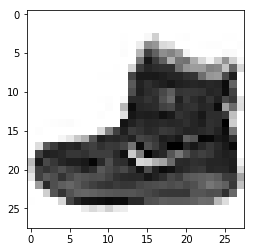

In [28]:
plt.imshow(x_train[0], cmap='Greys')

#Importing Layers, Optimizers and Models from Keras

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

#Creating the Generator

In [31]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 1024)             

#Creating the Discriminator

In [32]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

#Training Discriminator and Generator

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.720639, acc.: 29.69%] [G loss: 0.549854]


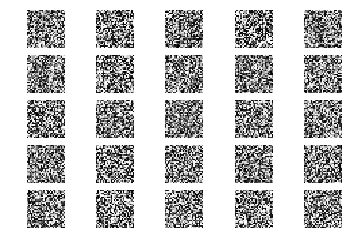

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.558709, acc.: 64.06%] [G loss: 0.614659]
2 [D loss: 0.473706, acc.: 64.06%] [G loss: 0.705627]
3 [D loss: 0.406373, acc.: 71.88%] [G loss: 0.851777]
4 [D loss: 0.359638, acc.: 82.81%] [G loss: 0.933485]
5 [D loss: 0.219819, acc.: 98.44%] [G loss: 1.132524]
6 [D loss: 0.224720, acc.: 100.00%] [G loss: 1.226486]
7 [D loss: 0.204187, acc.: 100.00%] [G loss: 1.333391]
8 [D loss: 0.177299, acc.: 100.00%] [G loss: 1.426164]
9 [D loss: 0.163912, acc.: 100.00%] [G loss: 1.454948]
10 [D loss: 0.165188, acc.: 98.44%] [G loss: 1.585557]
11 [D loss: 0.150769, acc.: 100.00%] [G loss: 1.722324]
12 [D loss: 0.129475, acc.: 100.00%] [G loss: 1.698503]
13 [D loss: 0.113550, acc.: 100.00%] [G loss: 1.846126]
14 [D loss: 0.152287, acc.: 96.88%] [G loss: 1.883703]
15 [D loss: 0.109777, acc.: 98.44%] [G loss: 1.905367]
16 [D loss: 0.089823, acc.: 100.00%] [G loss: 2.001639]
17 [D loss: 0.078251, acc.: 100.00%] [G loss: 2.045982]
18 [D loss: 0.084792, acc.: 100.00%] [G loss: 2.183100]
19 [D los

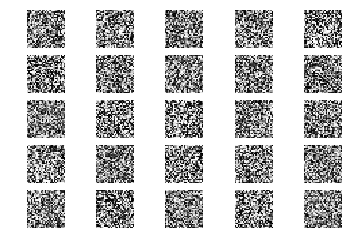

51 [D loss: 0.022867, acc.: 100.00%] [G loss: 3.405187]
52 [D loss: 0.027273, acc.: 100.00%] [G loss: 3.445838]
53 [D loss: 0.022072, acc.: 100.00%] [G loss: 3.400818]
54 [D loss: 0.023040, acc.: 100.00%] [G loss: 3.566075]
55 [D loss: 0.021876, acc.: 100.00%] [G loss: 3.573079]
56 [D loss: 0.023514, acc.: 100.00%] [G loss: 3.558020]
57 [D loss: 0.031269, acc.: 100.00%] [G loss: 3.674999]
58 [D loss: 0.019444, acc.: 100.00%] [G loss: 3.677516]
59 [D loss: 0.022362, acc.: 100.00%] [G loss: 3.696013]
60 [D loss: 0.015731, acc.: 100.00%] [G loss: 3.713956]
61 [D loss: 0.026245, acc.: 100.00%] [G loss: 3.700950]
62 [D loss: 0.023875, acc.: 100.00%] [G loss: 3.700484]
63 [D loss: 0.019697, acc.: 100.00%] [G loss: 3.877679]
64 [D loss: 0.024478, acc.: 100.00%] [G loss: 3.826368]
65 [D loss: 0.016249, acc.: 100.00%] [G loss: 3.966494]
66 [D loss: 0.022834, acc.: 100.00%] [G loss: 3.980015]
67 [D loss: 0.019950, acc.: 100.00%] [G loss: 3.914976]
68 [D loss: 0.018273, acc.: 100.00%] [G loss: 3.

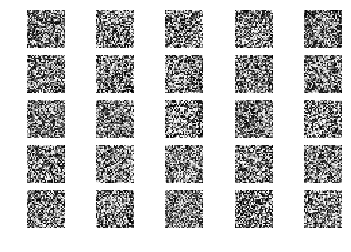

101 [D loss: 0.017604, acc.: 100.00%] [G loss: 4.620172]
102 [D loss: 0.011839, acc.: 100.00%] [G loss: 4.537768]
103 [D loss: 0.011515, acc.: 100.00%] [G loss: 4.599542]
104 [D loss: 0.039721, acc.: 98.44%] [G loss: 4.443137]
105 [D loss: 0.020466, acc.: 100.00%] [G loss: 4.458272]
106 [D loss: 0.016164, acc.: 100.00%] [G loss: 4.489206]
107 [D loss: 0.013084, acc.: 100.00%] [G loss: 4.629935]
108 [D loss: 0.014710, acc.: 100.00%] [G loss: 4.621128]
109 [D loss: 0.013634, acc.: 100.00%] [G loss: 4.703719]
110 [D loss: 0.011907, acc.: 100.00%] [G loss: 4.471007]
111 [D loss: 0.016455, acc.: 100.00%] [G loss: 4.600528]
112 [D loss: 0.017748, acc.: 100.00%] [G loss: 4.675725]
113 [D loss: 0.011349, acc.: 100.00%] [G loss: 4.640999]
114 [D loss: 0.019805, acc.: 100.00%] [G loss: 4.805982]
115 [D loss: 0.013045, acc.: 100.00%] [G loss: 4.642537]
116 [D loss: 0.011055, acc.: 100.00%] [G loss: 4.661598]
117 [D loss: 0.012290, acc.: 100.00%] [G loss: 4.719984]
118 [D loss: 0.011295, acc.: 100

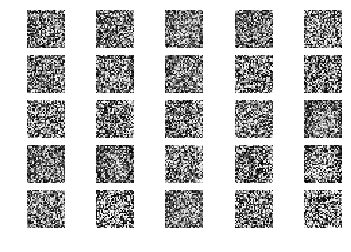

151 [D loss: 0.072760, acc.: 98.44%] [G loss: 4.201195]
152 [D loss: 0.093512, acc.: 95.31%] [G loss: 4.620390]
153 [D loss: 0.017876, acc.: 100.00%] [G loss: 4.851294]
154 [D loss: 0.072566, acc.: 95.31%] [G loss: 4.679361]
155 [D loss: 0.015886, acc.: 100.00%] [G loss: 4.630090]
156 [D loss: 0.036284, acc.: 100.00%] [G loss: 4.788844]
157 [D loss: 0.031689, acc.: 100.00%] [G loss: 5.033557]
158 [D loss: 0.071148, acc.: 98.44%] [G loss: 4.893906]
159 [D loss: 0.038277, acc.: 100.00%] [G loss: 5.216306]
160 [D loss: 0.040829, acc.: 100.00%] [G loss: 4.623861]
161 [D loss: 0.027428, acc.: 100.00%] [G loss: 4.945856]
162 [D loss: 0.020149, acc.: 100.00%] [G loss: 4.754666]
163 [D loss: 0.023346, acc.: 100.00%] [G loss: 4.824578]
164 [D loss: 0.020562, acc.: 100.00%] [G loss: 4.745743]
165 [D loss: 0.044856, acc.: 100.00%] [G loss: 4.493943]
166 [D loss: 0.035458, acc.: 100.00%] [G loss: 4.811178]
167 [D loss: 0.037247, acc.: 98.44%] [G loss: 4.872674]
168 [D loss: 0.087612, acc.: 98.44%]

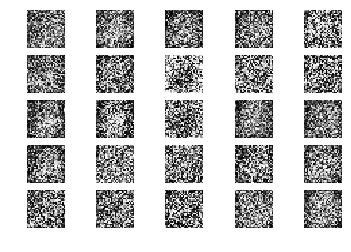

201 [D loss: 0.138704, acc.: 93.75%] [G loss: 4.003340]
202 [D loss: 0.065502, acc.: 96.88%] [G loss: 4.593681]
203 [D loss: 0.208182, acc.: 89.06%] [G loss: 4.649751]
204 [D loss: 0.234031, acc.: 87.50%] [G loss: 3.760487]
205 [D loss: 0.178276, acc.: 87.50%] [G loss: 4.363419]
206 [D loss: 0.208157, acc.: 89.06%] [G loss: 4.485141]
207 [D loss: 0.095030, acc.: 98.44%] [G loss: 4.889973]
208 [D loss: 0.055316, acc.: 98.44%] [G loss: 4.116355]
209 [D loss: 0.313378, acc.: 84.38%] [G loss: 4.173866]
210 [D loss: 0.168518, acc.: 96.88%] [G loss: 4.249371]
211 [D loss: 0.149578, acc.: 96.88%] [G loss: 3.942786]
212 [D loss: 0.048590, acc.: 98.44%] [G loss: 4.099882]
213 [D loss: 0.140554, acc.: 93.75%] [G loss: 4.150095]
214 [D loss: 0.080291, acc.: 98.44%] [G loss: 4.538420]
215 [D loss: 0.290580, acc.: 92.19%] [G loss: 3.824489]
216 [D loss: 0.105736, acc.: 96.88%] [G loss: 3.864875]
217 [D loss: 0.111307, acc.: 96.88%] [G loss: 4.206248]
218 [D loss: 0.098888, acc.: 100.00%] [G loss: 4

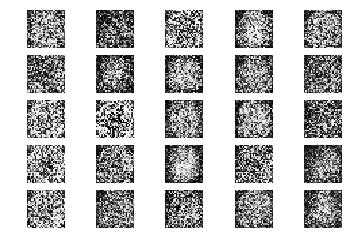

251 [D loss: 0.152527, acc.: 95.31%] [G loss: 4.001058]
252 [D loss: 0.095938, acc.: 98.44%] [G loss: 3.788029]
253 [D loss: 0.294238, acc.: 87.50%] [G loss: 3.022356]
254 [D loss: 0.309365, acc.: 89.06%] [G loss: 3.436978]
255 [D loss: 0.095176, acc.: 96.88%] [G loss: 4.579636]
256 [D loss: 0.321536, acc.: 85.94%] [G loss: 2.969722]
257 [D loss: 0.310797, acc.: 84.38%] [G loss: 3.700248]
258 [D loss: 0.070940, acc.: 98.44%] [G loss: 3.970825]
259 [D loss: 0.463182, acc.: 92.19%] [G loss: 3.318343]
260 [D loss: 0.286109, acc.: 92.19%] [G loss: 2.817328]
261 [D loss: 0.208382, acc.: 90.62%] [G loss: 3.966419]
262 [D loss: 0.176183, acc.: 95.31%] [G loss: 3.270047]
263 [D loss: 0.246210, acc.: 90.62%] [G loss: 3.801021]
264 [D loss: 0.090821, acc.: 98.44%] [G loss: 4.093424]
265 [D loss: 0.238161, acc.: 92.19%] [G loss: 2.787336]
266 [D loss: 0.119940, acc.: 93.75%] [G loss: 3.249140]
267 [D loss: 0.274279, acc.: 87.50%] [G loss: 3.837522]
268 [D loss: 0.207930, acc.: 93.75%] [G loss: 3.

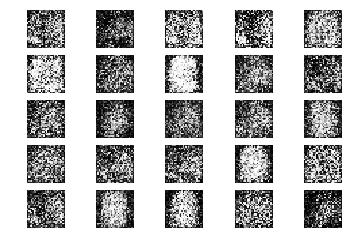

301 [D loss: 0.158631, acc.: 96.88%] [G loss: 3.279472]
302 [D loss: 0.428528, acc.: 76.56%] [G loss: 2.577128]
303 [D loss: 0.502963, acc.: 75.00%] [G loss: 2.671604]
304 [D loss: 0.383924, acc.: 85.94%] [G loss: 2.921484]
305 [D loss: 0.214892, acc.: 92.19%] [G loss: 3.392515]
306 [D loss: 0.388175, acc.: 85.94%] [G loss: 2.977262]
307 [D loss: 0.302878, acc.: 81.25%] [G loss: 3.486511]
308 [D loss: 0.203784, acc.: 95.31%] [G loss: 3.477090]
309 [D loss: 0.439090, acc.: 79.69%] [G loss: 2.468811]
310 [D loss: 0.218165, acc.: 89.06%] [G loss: 3.330860]
311 [D loss: 0.288244, acc.: 87.50%] [G loss: 3.227711]
312 [D loss: 0.395516, acc.: 87.50%] [G loss: 3.023482]
313 [D loss: 0.315115, acc.: 85.94%] [G loss: 2.968042]
314 [D loss: 0.173530, acc.: 98.44%] [G loss: 3.581235]
315 [D loss: 0.506004, acc.: 79.69%] [G loss: 2.919148]
316 [D loss: 0.310636, acc.: 84.38%] [G loss: 3.024211]
317 [D loss: 0.279011, acc.: 87.50%] [G loss: 3.273885]
318 [D loss: 0.486980, acc.: 76.56%] [G loss: 2.

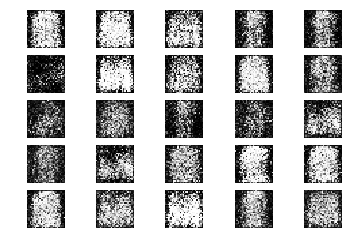

351 [D loss: 0.613599, acc.: 71.88%] [G loss: 2.138537]
352 [D loss: 0.480930, acc.: 81.25%] [G loss: 2.312460]
353 [D loss: 0.404045, acc.: 82.81%] [G loss: 2.524214]
354 [D loss: 0.448568, acc.: 81.25%] [G loss: 2.422578]
355 [D loss: 0.364687, acc.: 85.94%] [G loss: 2.262411]
356 [D loss: 0.361590, acc.: 81.25%] [G loss: 2.486747]
357 [D loss: 0.463681, acc.: 79.69%] [G loss: 2.625315]
358 [D loss: 0.272974, acc.: 93.75%] [G loss: 2.823148]
359 [D loss: 0.586708, acc.: 85.94%] [G loss: 2.505145]
360 [D loss: 0.707043, acc.: 54.69%] [G loss: 1.499502]
361 [D loss: 0.363142, acc.: 81.25%] [G loss: 2.927820]
362 [D loss: 0.567508, acc.: 84.38%] [G loss: 2.363443]
363 [D loss: 0.650165, acc.: 68.75%] [G loss: 2.368108]
364 [D loss: 0.481759, acc.: 76.56%] [G loss: 3.005356]
365 [D loss: 0.494610, acc.: 82.81%] [G loss: 2.076180]
366 [D loss: 0.483024, acc.: 70.31%] [G loss: 2.446978]
367 [D loss: 0.515999, acc.: 81.25%] [G loss: 2.375531]
368 [D loss: 0.633189, acc.: 62.50%] [G loss: 2.

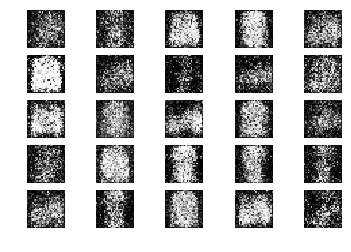

401 [D loss: 0.427599, acc.: 85.94%] [G loss: 2.133209]
402 [D loss: 0.761548, acc.: 60.94%] [G loss: 1.696681]
403 [D loss: 0.525587, acc.: 79.69%] [G loss: 1.946508]
404 [D loss: 0.965890, acc.: 65.62%] [G loss: 1.520940]
405 [D loss: 0.863824, acc.: 50.00%] [G loss: 1.334994]
406 [D loss: 0.649079, acc.: 70.31%] [G loss: 1.653192]
407 [D loss: 0.485051, acc.: 76.56%] [G loss: 1.662679]
408 [D loss: 0.473712, acc.: 76.56%] [G loss: 1.772001]
409 [D loss: 0.591995, acc.: 71.88%] [G loss: 1.695233]
410 [D loss: 0.581137, acc.: 60.94%] [G loss: 1.497286]
411 [D loss: 0.551690, acc.: 70.31%] [G loss: 1.591240]
412 [D loss: 0.548089, acc.: 79.69%] [G loss: 1.400253]
413 [D loss: 0.385215, acc.: 76.56%] [G loss: 2.084546]
414 [D loss: 0.577051, acc.: 79.69%] [G loss: 1.616238]
415 [D loss: 0.707961, acc.: 62.50%] [G loss: 1.426848]
416 [D loss: 0.654413, acc.: 71.88%] [G loss: 1.528714]
417 [D loss: 0.619453, acc.: 64.06%] [G loss: 1.398709]
418 [D loss: 0.777461, acc.: 62.50%] [G loss: 1.

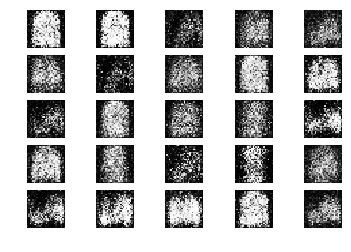

451 [D loss: 0.737853, acc.: 65.62%] [G loss: 1.387383]
452 [D loss: 0.633743, acc.: 65.62%] [G loss: 1.204958]
453 [D loss: 0.591709, acc.: 70.31%] [G loss: 1.303890]
454 [D loss: 0.608648, acc.: 67.19%] [G loss: 1.384858]
455 [D loss: 0.576481, acc.: 70.31%] [G loss: 1.401515]
456 [D loss: 0.698388, acc.: 73.44%] [G loss: 1.361510]
457 [D loss: 0.612422, acc.: 70.31%] [G loss: 1.218331]
458 [D loss: 0.537258, acc.: 70.31%] [G loss: 1.237919]
459 [D loss: 0.585139, acc.: 64.06%] [G loss: 1.338293]
460 [D loss: 0.536474, acc.: 70.31%] [G loss: 1.318462]
461 [D loss: 0.535333, acc.: 75.00%] [G loss: 1.350467]
462 [D loss: 0.459990, acc.: 81.25%] [G loss: 1.351444]
463 [D loss: 0.565813, acc.: 73.44%] [G loss: 1.222675]
464 [D loss: 0.531289, acc.: 70.31%] [G loss: 1.457079]
465 [D loss: 0.517873, acc.: 73.44%] [G loss: 1.544641]
466 [D loss: 0.667917, acc.: 56.25%] [G loss: 1.319476]
467 [D loss: 0.711839, acc.: 64.06%] [G loss: 1.228076]
468 [D loss: 0.487914, acc.: 82.81%] [G loss: 1.

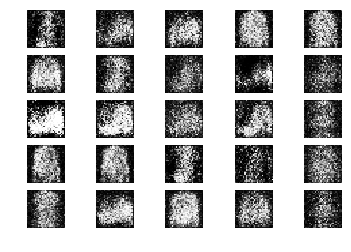

501 [D loss: 0.538244, acc.: 73.44%] [G loss: 1.247926]
502 [D loss: 0.576346, acc.: 75.00%] [G loss: 1.216795]
503 [D loss: 0.661182, acc.: 68.75%] [G loss: 1.159163]
504 [D loss: 0.616997, acc.: 67.19%] [G loss: 1.112136]
505 [D loss: 0.599974, acc.: 62.50%] [G loss: 1.075956]
506 [D loss: 0.595133, acc.: 68.75%] [G loss: 1.224936]
507 [D loss: 0.549263, acc.: 78.12%] [G loss: 1.191939]
508 [D loss: 0.662256, acc.: 62.50%] [G loss: 1.193499]
509 [D loss: 0.646412, acc.: 57.81%] [G loss: 1.098778]
510 [D loss: 0.544970, acc.: 71.88%] [G loss: 1.117875]
511 [D loss: 0.613876, acc.: 67.19%] [G loss: 1.329925]
512 [D loss: 0.710579, acc.: 70.31%] [G loss: 1.168584]
513 [D loss: 0.652099, acc.: 71.88%] [G loss: 1.048858]
514 [D loss: 0.676422, acc.: 59.38%] [G loss: 1.016468]
515 [D loss: 0.591757, acc.: 70.31%] [G loss: 1.070973]
516 [D loss: 0.701392, acc.: 60.94%] [G loss: 0.981335]
517 [D loss: 0.701351, acc.: 62.50%] [G loss: 0.955607]
518 [D loss: 0.670116, acc.: 65.62%] [G loss: 1.

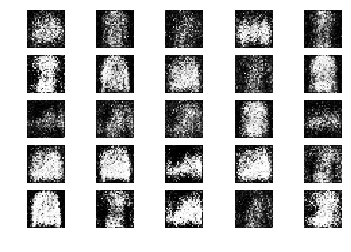

551 [D loss: 0.679669, acc.: 67.19%] [G loss: 0.968092]
552 [D loss: 0.588828, acc.: 65.62%] [G loss: 1.103677]
553 [D loss: 0.636832, acc.: 62.50%] [G loss: 1.145164]
554 [D loss: 0.584184, acc.: 70.31%] [G loss: 1.167381]
555 [D loss: 0.551332, acc.: 78.12%] [G loss: 1.190730]
556 [D loss: 0.577095, acc.: 70.31%] [G loss: 1.107558]
557 [D loss: 0.687824, acc.: 56.25%] [G loss: 1.079831]
558 [D loss: 0.597467, acc.: 65.62%] [G loss: 1.111020]
559 [D loss: 0.598970, acc.: 64.06%] [G loss: 1.023508]
560 [D loss: 0.653265, acc.: 62.50%] [G loss: 0.986211]
561 [D loss: 0.711331, acc.: 59.38%] [G loss: 0.919933]
562 [D loss: 0.623301, acc.: 67.19%] [G loss: 0.879460]
563 [D loss: 0.649724, acc.: 56.25%] [G loss: 0.906248]
564 [D loss: 0.546762, acc.: 73.44%] [G loss: 1.035904]
565 [D loss: 0.623594, acc.: 62.50%] [G loss: 1.046234]
566 [D loss: 0.552687, acc.: 68.75%] [G loss: 1.042480]
567 [D loss: 0.649593, acc.: 59.38%] [G loss: 1.203106]
568 [D loss: 0.613497, acc.: 71.88%] [G loss: 1.

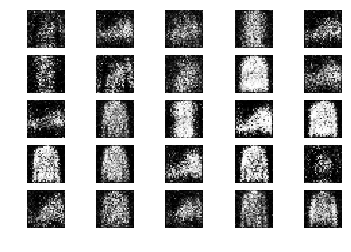

601 [D loss: 0.638173, acc.: 62.50%] [G loss: 1.066435]
602 [D loss: 0.584578, acc.: 68.75%] [G loss: 1.073240]
603 [D loss: 0.509962, acc.: 79.69%] [G loss: 1.108816]
604 [D loss: 0.551143, acc.: 78.12%] [G loss: 1.134131]
605 [D loss: 0.566270, acc.: 73.44%] [G loss: 1.117633]
606 [D loss: 0.698233, acc.: 59.38%] [G loss: 1.050559]
607 [D loss: 0.605896, acc.: 70.31%] [G loss: 1.020654]
608 [D loss: 0.655841, acc.: 60.94%] [G loss: 0.983461]
609 [D loss: 0.594866, acc.: 65.62%] [G loss: 0.952930]
610 [D loss: 0.556044, acc.: 75.00%] [G loss: 1.104884]
611 [D loss: 0.583685, acc.: 64.06%] [G loss: 1.043680]
612 [D loss: 0.521196, acc.: 79.69%] [G loss: 0.974131]
613 [D loss: 0.637018, acc.: 70.31%] [G loss: 1.123135]
614 [D loss: 0.634881, acc.: 64.06%] [G loss: 1.141423]
615 [D loss: 0.516250, acc.: 81.25%] [G loss: 1.150538]
616 [D loss: 0.562861, acc.: 70.31%] [G loss: 1.024628]
617 [D loss: 0.649257, acc.: 60.94%] [G loss: 1.075905]
618 [D loss: 0.595996, acc.: 59.38%] [G loss: 1.

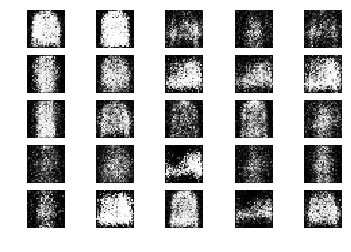

651 [D loss: 0.539829, acc.: 68.75%] [G loss: 1.059841]
652 [D loss: 0.590114, acc.: 76.56%] [G loss: 1.021669]
653 [D loss: 0.541477, acc.: 73.44%] [G loss: 1.115791]
654 [D loss: 0.495956, acc.: 82.81%] [G loss: 1.137555]
655 [D loss: 0.591448, acc.: 65.62%] [G loss: 1.134490]
656 [D loss: 0.598376, acc.: 70.31%] [G loss: 1.205426]
657 [D loss: 0.598991, acc.: 62.50%] [G loss: 1.024681]
658 [D loss: 0.634356, acc.: 65.62%] [G loss: 1.027013]
659 [D loss: 0.543266, acc.: 73.44%] [G loss: 1.148649]
660 [D loss: 0.519996, acc.: 76.56%] [G loss: 1.163689]
661 [D loss: 0.562187, acc.: 73.44%] [G loss: 1.039721]
662 [D loss: 0.594919, acc.: 65.62%] [G loss: 1.149849]
663 [D loss: 0.575115, acc.: 70.31%] [G loss: 1.068863]
664 [D loss: 0.558384, acc.: 79.69%] [G loss: 1.142360]
665 [D loss: 0.654146, acc.: 62.50%] [G loss: 1.047157]
666 [D loss: 0.557433, acc.: 67.19%] [G loss: 1.063528]
667 [D loss: 0.523071, acc.: 84.38%] [G loss: 1.142389]
668 [D loss: 0.640110, acc.: 59.38%] [G loss: 1.

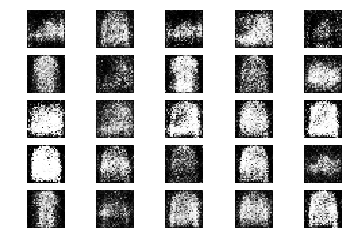

701 [D loss: 0.556104, acc.: 75.00%] [G loss: 0.982528]
702 [D loss: 0.546920, acc.: 82.81%] [G loss: 0.951337]
703 [D loss: 0.537817, acc.: 79.69%] [G loss: 1.092800]
704 [D loss: 0.556947, acc.: 76.56%] [G loss: 1.217304]
705 [D loss: 0.573152, acc.: 68.75%] [G loss: 1.118957]
706 [D loss: 0.608861, acc.: 62.50%] [G loss: 1.127809]
707 [D loss: 0.663597, acc.: 59.38%] [G loss: 1.047078]
708 [D loss: 0.582513, acc.: 78.12%] [G loss: 1.167563]
709 [D loss: 0.576824, acc.: 65.62%] [G loss: 1.142472]
710 [D loss: 0.617584, acc.: 67.19%] [G loss: 1.133046]
711 [D loss: 0.527000, acc.: 73.44%] [G loss: 1.105318]
712 [D loss: 0.639449, acc.: 64.06%] [G loss: 0.973993]
713 [D loss: 0.538096, acc.: 68.75%] [G loss: 1.259471]
714 [D loss: 0.596778, acc.: 71.88%] [G loss: 1.097323]
715 [D loss: 0.676654, acc.: 59.38%] [G loss: 1.043234]
716 [D loss: 0.642874, acc.: 68.75%] [G loss: 1.094179]
717 [D loss: 0.551179, acc.: 76.56%] [G loss: 1.005190]
718 [D loss: 0.526951, acc.: 73.44%] [G loss: 1.

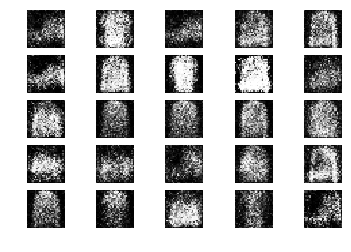

751 [D loss: 0.653109, acc.: 56.25%] [G loss: 0.952302]
752 [D loss: 0.572235, acc.: 68.75%] [G loss: 1.098982]
753 [D loss: 0.537389, acc.: 70.31%] [G loss: 1.064380]
754 [D loss: 0.615226, acc.: 62.50%] [G loss: 1.133450]
755 [D loss: 0.711831, acc.: 60.94%] [G loss: 1.045992]
756 [D loss: 0.575161, acc.: 70.31%] [G loss: 0.993310]
757 [D loss: 0.540157, acc.: 81.25%] [G loss: 1.035783]
758 [D loss: 0.566130, acc.: 75.00%] [G loss: 0.985847]
759 [D loss: 0.625894, acc.: 67.19%] [G loss: 0.979005]
760 [D loss: 0.598845, acc.: 70.31%] [G loss: 1.074791]
761 [D loss: 0.544542, acc.: 79.69%] [G loss: 1.007789]
762 [D loss: 0.596605, acc.: 71.88%] [G loss: 1.064137]
763 [D loss: 0.482511, acc.: 79.69%] [G loss: 1.118764]
764 [D loss: 0.565932, acc.: 73.44%] [G loss: 1.207910]
765 [D loss: 0.580154, acc.: 67.19%] [G loss: 1.036092]
766 [D loss: 0.622018, acc.: 62.50%] [G loss: 1.083891]
767 [D loss: 0.629439, acc.: 67.19%] [G loss: 1.067703]
768 [D loss: 0.585271, acc.: 64.06%] [G loss: 1.

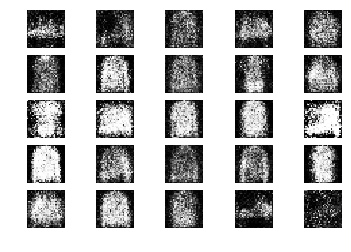

801 [D loss: 0.606344, acc.: 67.19%] [G loss: 0.917907]
802 [D loss: 0.540392, acc.: 75.00%] [G loss: 0.982122]
803 [D loss: 0.558793, acc.: 73.44%] [G loss: 1.022108]
804 [D loss: 0.609569, acc.: 68.75%] [G loss: 0.988186]
805 [D loss: 0.566379, acc.: 71.88%] [G loss: 1.005081]
806 [D loss: 0.606414, acc.: 64.06%] [G loss: 0.987930]
807 [D loss: 0.558064, acc.: 76.56%] [G loss: 0.973976]
808 [D loss: 0.606095, acc.: 64.06%] [G loss: 1.046760]
809 [D loss: 0.673383, acc.: 59.38%] [G loss: 1.097973]
810 [D loss: 0.581237, acc.: 76.56%] [G loss: 1.009689]
811 [D loss: 0.566892, acc.: 73.44%] [G loss: 1.023902]
812 [D loss: 0.661178, acc.: 64.06%] [G loss: 0.995476]
813 [D loss: 0.659819, acc.: 68.75%] [G loss: 0.953489]
814 [D loss: 0.556578, acc.: 70.31%] [G loss: 1.104190]
815 [D loss: 0.570765, acc.: 71.88%] [G loss: 1.103287]
816 [D loss: 0.637435, acc.: 64.06%] [G loss: 0.974376]
817 [D loss: 0.657838, acc.: 64.06%] [G loss: 1.131826]
818 [D loss: 0.607128, acc.: 68.75%] [G loss: 0.

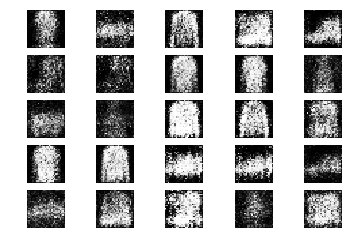

851 [D loss: 0.666047, acc.: 60.94%] [G loss: 0.933209]
852 [D loss: 0.628184, acc.: 64.06%] [G loss: 1.032913]
853 [D loss: 0.611132, acc.: 68.75%] [G loss: 1.044895]
854 [D loss: 0.641276, acc.: 65.62%] [G loss: 1.011116]
855 [D loss: 0.510733, acc.: 84.38%] [G loss: 0.940117]
856 [D loss: 0.616711, acc.: 64.06%] [G loss: 1.004653]
857 [D loss: 0.589162, acc.: 73.44%] [G loss: 1.117848]
858 [D loss: 0.554397, acc.: 71.88%] [G loss: 1.105771]
859 [D loss: 0.611862, acc.: 68.75%] [G loss: 0.994987]
860 [D loss: 0.536316, acc.: 76.56%] [G loss: 1.061306]
861 [D loss: 0.688004, acc.: 67.19%] [G loss: 0.969976]
862 [D loss: 0.568816, acc.: 71.88%] [G loss: 0.951551]
863 [D loss: 0.664081, acc.: 54.69%] [G loss: 0.958207]
864 [D loss: 0.534535, acc.: 78.12%] [G loss: 0.984828]
865 [D loss: 0.579544, acc.: 68.75%] [G loss: 1.111585]
866 [D loss: 0.626995, acc.: 59.38%] [G loss: 0.960874]
867 [D loss: 0.637231, acc.: 57.81%] [G loss: 0.892421]
868 [D loss: 0.573294, acc.: 68.75%] [G loss: 0.

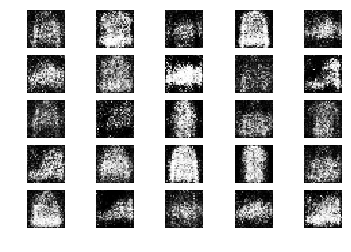

901 [D loss: 0.551200, acc.: 68.75%] [G loss: 0.914466]
902 [D loss: 0.715744, acc.: 54.69%] [G loss: 1.088747]
903 [D loss: 0.597013, acc.: 65.62%] [G loss: 0.954893]
904 [D loss: 0.607098, acc.: 68.75%] [G loss: 1.007864]
905 [D loss: 0.612221, acc.: 67.19%] [G loss: 1.056000]
906 [D loss: 0.567864, acc.: 76.56%] [G loss: 0.946668]
907 [D loss: 0.562861, acc.: 75.00%] [G loss: 0.961107]
908 [D loss: 0.591592, acc.: 73.44%] [G loss: 0.904723]
909 [D loss: 0.620607, acc.: 70.31%] [G loss: 1.050873]
910 [D loss: 0.570754, acc.: 67.19%] [G loss: 0.989237]
911 [D loss: 0.570956, acc.: 73.44%] [G loss: 1.066229]
912 [D loss: 0.595290, acc.: 73.44%] [G loss: 0.921198]
913 [D loss: 0.601910, acc.: 59.38%] [G loss: 0.962679]
914 [D loss: 0.583850, acc.: 68.75%] [G loss: 1.124132]
915 [D loss: 0.641822, acc.: 59.38%] [G loss: 1.034223]
916 [D loss: 0.584293, acc.: 64.06%] [G loss: 1.003000]
917 [D loss: 0.667027, acc.: 56.25%] [G loss: 0.974173]
918 [D loss: 0.566861, acc.: 68.75%] [G loss: 1.

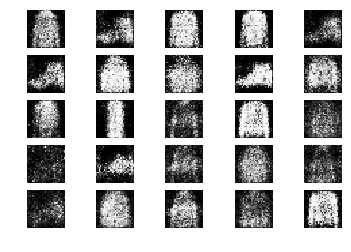

951 [D loss: 0.672256, acc.: 59.38%] [G loss: 0.983810]
952 [D loss: 0.650769, acc.: 60.94%] [G loss: 0.976894]
953 [D loss: 0.681920, acc.: 62.50%] [G loss: 0.993069]
954 [D loss: 0.561148, acc.: 68.75%] [G loss: 0.925836]
955 [D loss: 0.595520, acc.: 75.00%] [G loss: 0.959439]
956 [D loss: 0.637649, acc.: 67.19%] [G loss: 0.939748]
957 [D loss: 0.617868, acc.: 62.50%] [G loss: 0.960646]
958 [D loss: 0.602421, acc.: 78.12%] [G loss: 0.791158]
959 [D loss: 0.586437, acc.: 70.31%] [G loss: 0.891713]
960 [D loss: 0.640528, acc.: 62.50%] [G loss: 1.015989]
961 [D loss: 0.645684, acc.: 60.94%] [G loss: 0.971374]
962 [D loss: 0.575211, acc.: 73.44%] [G loss: 0.865314]
963 [D loss: 0.640143, acc.: 65.62%] [G loss: 0.957006]
964 [D loss: 0.589381, acc.: 65.62%] [G loss: 0.911293]
965 [D loss: 0.585457, acc.: 68.75%] [G loss: 0.902039]
966 [D loss: 0.579055, acc.: 73.44%] [G loss: 0.919422]
967 [D loss: 0.644485, acc.: 64.06%] [G loss: 1.010833]
968 [D loss: 0.643307, acc.: 60.94%] [G loss: 1.

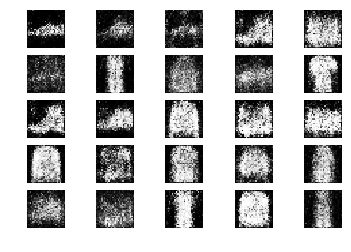

1001 [D loss: 0.611942, acc.: 65.62%] [G loss: 1.009002]
1002 [D loss: 0.633413, acc.: 64.06%] [G loss: 0.966079]
1003 [D loss: 0.597145, acc.: 68.75%] [G loss: 1.037806]
1004 [D loss: 0.632596, acc.: 62.50%] [G loss: 0.991062]
1005 [D loss: 0.607637, acc.: 67.19%] [G loss: 0.975038]
1006 [D loss: 0.645709, acc.: 65.62%] [G loss: 1.055220]
1007 [D loss: 0.649960, acc.: 62.50%] [G loss: 0.994316]
1008 [D loss: 0.596715, acc.: 71.88%] [G loss: 0.961700]
1009 [D loss: 0.584857, acc.: 79.69%] [G loss: 0.942355]
1010 [D loss: 0.597445, acc.: 65.62%] [G loss: 0.924147]
1011 [D loss: 0.573828, acc.: 73.44%] [G loss: 0.862157]
1012 [D loss: 0.581356, acc.: 78.12%] [G loss: 0.861550]
1013 [D loss: 0.608559, acc.: 73.44%] [G loss: 0.962832]
1014 [D loss: 0.593052, acc.: 70.31%] [G loss: 1.034041]
1015 [D loss: 0.629438, acc.: 73.44%] [G loss: 1.019439]
1016 [D loss: 0.662652, acc.: 68.75%] [G loss: 0.870651]
1017 [D loss: 0.553604, acc.: 75.00%] [G loss: 0.993257]
1018 [D loss: 0.614448, acc.: 6

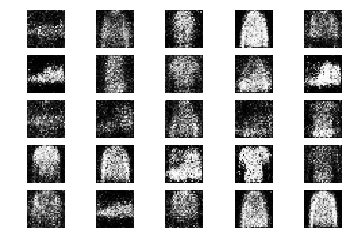

1051 [D loss: 0.606246, acc.: 64.06%] [G loss: 0.876822]
1052 [D loss: 0.651033, acc.: 62.50%] [G loss: 0.996911]
1053 [D loss: 0.672086, acc.: 54.69%] [G loss: 1.174202]
1054 [D loss: 0.677727, acc.: 59.38%] [G loss: 1.003986]
1055 [D loss: 0.647740, acc.: 62.50%] [G loss: 0.927039]
1056 [D loss: 0.640621, acc.: 65.62%] [G loss: 1.023215]
1057 [D loss: 0.535354, acc.: 75.00%] [G loss: 0.932775]
1058 [D loss: 0.608061, acc.: 73.44%] [G loss: 0.871598]
1059 [D loss: 0.597947, acc.: 68.75%] [G loss: 0.952982]
1060 [D loss: 0.600936, acc.: 68.75%] [G loss: 0.975076]
1061 [D loss: 0.571965, acc.: 68.75%] [G loss: 0.986998]
1062 [D loss: 0.602375, acc.: 67.19%] [G loss: 0.963744]
1063 [D loss: 0.612137, acc.: 59.38%] [G loss: 1.019049]
1064 [D loss: 0.563899, acc.: 76.56%] [G loss: 0.949074]
1065 [D loss: 0.548679, acc.: 78.12%] [G loss: 0.835314]
1066 [D loss: 0.568089, acc.: 76.56%] [G loss: 0.876632]
1067 [D loss: 0.615162, acc.: 60.94%] [G loss: 0.964999]
1068 [D loss: 0.550406, acc.: 7

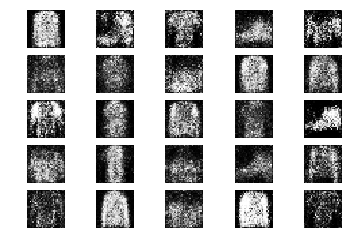

1101 [D loss: 0.622812, acc.: 68.75%] [G loss: 0.892757]
1102 [D loss: 0.668008, acc.: 60.94%] [G loss: 0.887622]
1103 [D loss: 0.607557, acc.: 65.62%] [G loss: 0.948889]
1104 [D loss: 0.604623, acc.: 71.88%] [G loss: 0.897229]
1105 [D loss: 0.644663, acc.: 62.50%] [G loss: 1.038515]
1106 [D loss: 0.606113, acc.: 75.00%] [G loss: 0.963842]
1107 [D loss: 0.619328, acc.: 57.81%] [G loss: 0.906298]
1108 [D loss: 0.644225, acc.: 59.38%] [G loss: 0.946274]
1109 [D loss: 0.624512, acc.: 70.31%] [G loss: 0.974186]
1110 [D loss: 0.606107, acc.: 62.50%] [G loss: 0.864031]
1111 [D loss: 0.612288, acc.: 73.44%] [G loss: 0.942203]
1112 [D loss: 0.655326, acc.: 60.94%] [G loss: 0.790320]
1113 [D loss: 0.651770, acc.: 68.75%] [G loss: 0.811713]
1114 [D loss: 0.624797, acc.: 68.75%] [G loss: 0.960111]
1115 [D loss: 0.653346, acc.: 67.19%] [G loss: 0.950643]
1116 [D loss: 0.599029, acc.: 67.19%] [G loss: 0.911282]
1117 [D loss: 0.607808, acc.: 65.62%] [G loss: 0.922644]
1118 [D loss: 0.562126, acc.: 7

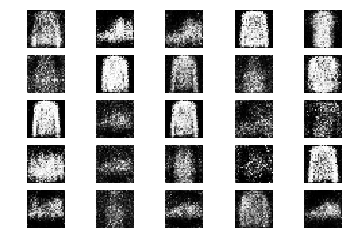

1151 [D loss: 0.604816, acc.: 62.50%] [G loss: 0.954499]
1152 [D loss: 0.587013, acc.: 71.88%] [G loss: 1.006054]
1153 [D loss: 0.654283, acc.: 65.62%] [G loss: 1.022273]
1154 [D loss: 0.640281, acc.: 68.75%] [G loss: 0.988331]
1155 [D loss: 0.668037, acc.: 57.81%] [G loss: 0.905126]
1156 [D loss: 0.678630, acc.: 54.69%] [G loss: 0.791040]
1157 [D loss: 0.628574, acc.: 65.62%] [G loss: 0.978627]
1158 [D loss: 0.629343, acc.: 62.50%] [G loss: 0.865878]
1159 [D loss: 0.581078, acc.: 65.62%] [G loss: 0.901969]
1160 [D loss: 0.688894, acc.: 64.06%] [G loss: 0.952509]
1161 [D loss: 0.650491, acc.: 62.50%] [G loss: 0.933925]
1162 [D loss: 0.694817, acc.: 56.25%] [G loss: 0.903258]
1163 [D loss: 0.598332, acc.: 70.31%] [G loss: 0.937627]
1164 [D loss: 0.668099, acc.: 57.81%] [G loss: 0.975303]
1165 [D loss: 0.629537, acc.: 71.88%] [G loss: 0.859217]
1166 [D loss: 0.599601, acc.: 64.06%] [G loss: 0.858484]
1167 [D loss: 0.630569, acc.: 62.50%] [G loss: 0.885041]
1168 [D loss: 0.599012, acc.: 6

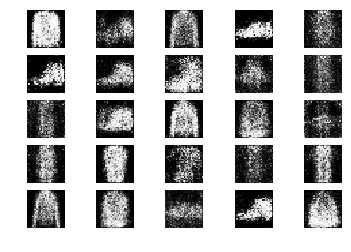

1201 [D loss: 0.577618, acc.: 73.44%] [G loss: 0.928626]
1202 [D loss: 0.644634, acc.: 62.50%] [G loss: 0.857622]
1203 [D loss: 0.661003, acc.: 57.81%] [G loss: 0.946990]
1204 [D loss: 0.639291, acc.: 64.06%] [G loss: 0.899988]
1205 [D loss: 0.593311, acc.: 65.62%] [G loss: 0.951379]
1206 [D loss: 0.617954, acc.: 67.19%] [G loss: 1.005096]
1207 [D loss: 0.580707, acc.: 67.19%] [G loss: 0.901043]
1208 [D loss: 0.644132, acc.: 68.75%] [G loss: 0.888531]
1209 [D loss: 0.613849, acc.: 65.62%] [G loss: 0.932356]
1210 [D loss: 0.653980, acc.: 65.62%] [G loss: 0.857093]
1211 [D loss: 0.665329, acc.: 59.38%] [G loss: 0.869837]
1212 [D loss: 0.662082, acc.: 65.62%] [G loss: 0.815683]
1213 [D loss: 0.589336, acc.: 78.12%] [G loss: 0.876737]
1214 [D loss: 0.634782, acc.: 68.75%] [G loss: 0.868711]
1215 [D loss: 0.690465, acc.: 59.38%] [G loss: 0.924151]
1216 [D loss: 0.622055, acc.: 68.75%] [G loss: 0.969653]
1217 [D loss: 0.616738, acc.: 71.88%] [G loss: 0.922137]
1218 [D loss: 0.612302, acc.: 6

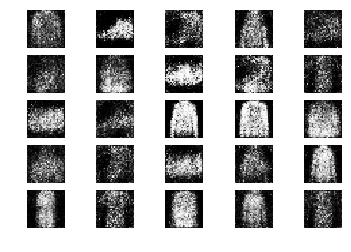

1251 [D loss: 0.583378, acc.: 70.31%] [G loss: 0.922575]
1252 [D loss: 0.598921, acc.: 64.06%] [G loss: 0.916359]
1253 [D loss: 0.641132, acc.: 65.62%] [G loss: 0.889446]
1254 [D loss: 0.582519, acc.: 67.19%] [G loss: 0.838916]
1255 [D loss: 0.556317, acc.: 78.12%] [G loss: 0.961665]
1256 [D loss: 0.628697, acc.: 67.19%] [G loss: 0.985452]
1257 [D loss: 0.595605, acc.: 65.62%] [G loss: 0.941336]
1258 [D loss: 0.540159, acc.: 75.00%] [G loss: 0.973229]
1259 [D loss: 0.678496, acc.: 62.50%] [G loss: 0.911089]
1260 [D loss: 0.595708, acc.: 67.19%] [G loss: 0.987760]
1261 [D loss: 0.611381, acc.: 68.75%] [G loss: 0.940196]
1262 [D loss: 0.570029, acc.: 75.00%] [G loss: 0.906246]
1263 [D loss: 0.631038, acc.: 56.25%] [G loss: 1.040457]
1264 [D loss: 0.642952, acc.: 59.38%] [G loss: 0.846495]
1265 [D loss: 0.579980, acc.: 73.44%] [G loss: 0.890335]
1266 [D loss: 0.601204, acc.: 68.75%] [G loss: 0.909325]
1267 [D loss: 0.688304, acc.: 54.69%] [G loss: 0.831010]
1268 [D loss: 0.610135, acc.: 6

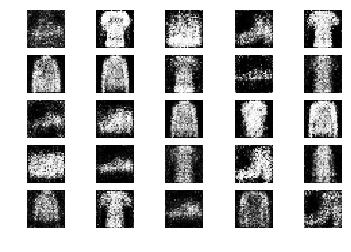

1301 [D loss: 0.595124, acc.: 71.88%] [G loss: 0.942668]
1302 [D loss: 0.605676, acc.: 70.31%] [G loss: 0.877434]
1303 [D loss: 0.581651, acc.: 73.44%] [G loss: 0.854211]
1304 [D loss: 0.666338, acc.: 57.81%] [G loss: 0.858852]
1305 [D loss: 0.646029, acc.: 62.50%] [G loss: 0.888693]
1306 [D loss: 0.621929, acc.: 67.19%] [G loss: 0.890527]
1307 [D loss: 0.559835, acc.: 68.75%] [G loss: 0.972639]
1308 [D loss: 0.612271, acc.: 65.62%] [G loss: 0.950760]
1309 [D loss: 0.646970, acc.: 62.50%] [G loss: 0.856951]
1310 [D loss: 0.658803, acc.: 65.62%] [G loss: 0.959963]
1311 [D loss: 0.653865, acc.: 60.94%] [G loss: 0.957142]
1312 [D loss: 0.563070, acc.: 73.44%] [G loss: 0.954459]
1313 [D loss: 0.657076, acc.: 56.25%] [G loss: 0.903068]
1314 [D loss: 0.653927, acc.: 56.25%] [G loss: 0.812718]
1315 [D loss: 0.639182, acc.: 59.38%] [G loss: 0.925498]
1316 [D loss: 0.595408, acc.: 65.62%] [G loss: 0.897664]
1317 [D loss: 0.630369, acc.: 65.62%] [G loss: 0.911838]
1318 [D loss: 0.603384, acc.: 7

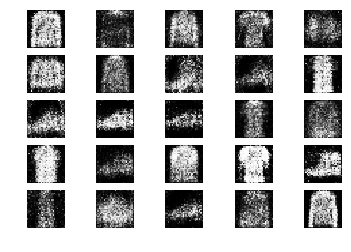

1351 [D loss: 0.619938, acc.: 67.19%] [G loss: 0.911727]
1352 [D loss: 0.673507, acc.: 59.38%] [G loss: 0.920742]
1353 [D loss: 0.677191, acc.: 64.06%] [G loss: 0.896488]
1354 [D loss: 0.626353, acc.: 68.75%] [G loss: 0.892967]
1355 [D loss: 0.636061, acc.: 57.81%] [G loss: 0.902992]
1356 [D loss: 0.593619, acc.: 64.06%] [G loss: 0.925045]
1357 [D loss: 0.640172, acc.: 60.94%] [G loss: 0.989636]
1358 [D loss: 0.605061, acc.: 67.19%] [G loss: 0.919000]
1359 [D loss: 0.585081, acc.: 68.75%] [G loss: 0.879960]
1360 [D loss: 0.618947, acc.: 62.50%] [G loss: 0.978324]
1361 [D loss: 0.678638, acc.: 59.38%] [G loss: 0.789206]
1362 [D loss: 0.603866, acc.: 70.31%] [G loss: 0.846861]
1363 [D loss: 0.636855, acc.: 65.62%] [G loss: 0.910737]
1364 [D loss: 0.591149, acc.: 71.88%] [G loss: 1.003676]
1365 [D loss: 0.680750, acc.: 51.56%] [G loss: 0.956157]
1366 [D loss: 0.608442, acc.: 70.31%] [G loss: 0.928078]
1367 [D loss: 0.638134, acc.: 56.25%] [G loss: 0.840463]
1368 [D loss: 0.627751, acc.: 7

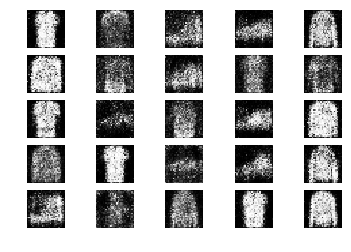

1401 [D loss: 0.581792, acc.: 68.75%] [G loss: 0.807302]
1402 [D loss: 0.553631, acc.: 79.69%] [G loss: 0.915094]
1403 [D loss: 0.639485, acc.: 60.94%] [G loss: 0.900873]
1404 [D loss: 0.564339, acc.: 68.75%] [G loss: 0.987446]
1405 [D loss: 0.561850, acc.: 71.88%] [G loss: 0.911834]
1406 [D loss: 0.689621, acc.: 53.12%] [G loss: 1.061370]
1407 [D loss: 0.660090, acc.: 53.12%] [G loss: 0.941645]
1408 [D loss: 0.595256, acc.: 68.75%] [G loss: 0.786130]
1409 [D loss: 0.589620, acc.: 71.88%] [G loss: 0.909751]
1410 [D loss: 0.623255, acc.: 70.31%] [G loss: 0.862090]
1411 [D loss: 0.648823, acc.: 65.62%] [G loss: 0.827017]
1412 [D loss: 0.600884, acc.: 71.88%] [G loss: 0.980369]
1413 [D loss: 0.651793, acc.: 57.81%] [G loss: 0.930754]
1414 [D loss: 0.650025, acc.: 64.06%] [G loss: 0.999108]
1415 [D loss: 0.709527, acc.: 50.00%] [G loss: 0.959096]
1416 [D loss: 0.590916, acc.: 73.44%] [G loss: 0.806663]
1417 [D loss: 0.589716, acc.: 76.56%] [G loss: 1.008497]
1418 [D loss: 0.622994, acc.: 6

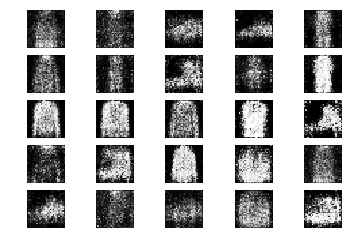

1451 [D loss: 0.643097, acc.: 62.50%] [G loss: 0.827829]
1452 [D loss: 0.604969, acc.: 65.62%] [G loss: 0.842087]
1453 [D loss: 0.650443, acc.: 59.38%] [G loss: 0.816750]
1454 [D loss: 0.643682, acc.: 64.06%] [G loss: 0.881000]
1455 [D loss: 0.645538, acc.: 59.38%] [G loss: 0.855246]
1456 [D loss: 0.619533, acc.: 64.06%] [G loss: 0.863539]
1457 [D loss: 0.644879, acc.: 53.12%] [G loss: 0.857895]
1458 [D loss: 0.611899, acc.: 65.62%] [G loss: 0.842104]
1459 [D loss: 0.600478, acc.: 70.31%] [G loss: 0.947339]
1460 [D loss: 0.566098, acc.: 73.44%] [G loss: 0.948467]
1461 [D loss: 0.590488, acc.: 67.19%] [G loss: 0.909687]
1462 [D loss: 0.636318, acc.: 65.62%] [G loss: 0.989754]
1463 [D loss: 0.638193, acc.: 57.81%] [G loss: 1.105764]
1464 [D loss: 0.598825, acc.: 64.06%] [G loss: 0.885639]
1465 [D loss: 0.579913, acc.: 71.88%] [G loss: 0.858947]
1466 [D loss: 0.557724, acc.: 76.56%] [G loss: 0.958755]
1467 [D loss: 0.623253, acc.: 65.62%] [G loss: 0.876844]
1468 [D loss: 0.664931, acc.: 5

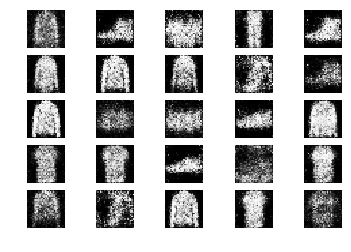

1501 [D loss: 0.645179, acc.: 59.38%] [G loss: 0.852260]
1502 [D loss: 0.624511, acc.: 67.19%] [G loss: 0.821834]
1503 [D loss: 0.532908, acc.: 79.69%] [G loss: 0.947201]
1504 [D loss: 0.590183, acc.: 62.50%] [G loss: 0.961183]
1505 [D loss: 0.621542, acc.: 70.31%] [G loss: 0.901409]
1506 [D loss: 0.552577, acc.: 75.00%] [G loss: 0.928219]
1507 [D loss: 0.643794, acc.: 65.62%] [G loss: 0.992684]
1508 [D loss: 0.576624, acc.: 67.19%] [G loss: 0.894645]
1509 [D loss: 0.576113, acc.: 76.56%] [G loss: 0.895719]
1510 [D loss: 0.666051, acc.: 60.94%] [G loss: 0.859913]
1511 [D loss: 0.586157, acc.: 68.75%] [G loss: 0.991466]
1512 [D loss: 0.656883, acc.: 62.50%] [G loss: 0.984723]
1513 [D loss: 0.563462, acc.: 76.56%] [G loss: 0.960837]
1514 [D loss: 0.593326, acc.: 67.19%] [G loss: 0.897812]
1515 [D loss: 0.579955, acc.: 64.06%] [G loss: 0.929985]
1516 [D loss: 0.615100, acc.: 65.62%] [G loss: 0.877109]
1517 [D loss: 0.599161, acc.: 62.50%] [G loss: 0.936611]
1518 [D loss: 0.614293, acc.: 7

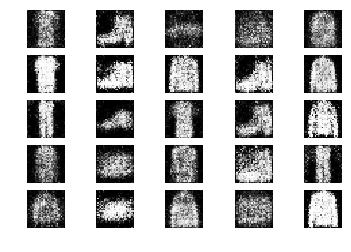

1551 [D loss: 0.640698, acc.: 62.50%] [G loss: 0.899119]
1552 [D loss: 0.701862, acc.: 53.12%] [G loss: 0.988637]
1553 [D loss: 0.586132, acc.: 70.31%] [G loss: 1.008432]
1554 [D loss: 0.643836, acc.: 53.12%] [G loss: 0.877160]
1555 [D loss: 0.625591, acc.: 65.62%] [G loss: 0.988762]
1556 [D loss: 0.595532, acc.: 67.19%] [G loss: 1.064798]
1557 [D loss: 0.631276, acc.: 65.62%] [G loss: 1.007267]
1558 [D loss: 0.642874, acc.: 62.50%] [G loss: 0.965677]
1559 [D loss: 0.609940, acc.: 65.62%] [G loss: 0.918382]
1560 [D loss: 0.629131, acc.: 60.94%] [G loss: 0.961926]
1561 [D loss: 0.572341, acc.: 76.56%] [G loss: 0.935518]
1562 [D loss: 0.572522, acc.: 68.75%] [G loss: 1.021735]
1563 [D loss: 0.583160, acc.: 70.31%] [G loss: 0.858830]
1564 [D loss: 0.596048, acc.: 70.31%] [G loss: 0.797940]
1565 [D loss: 0.624950, acc.: 62.50%] [G loss: 0.818722]
1566 [D loss: 0.603746, acc.: 67.19%] [G loss: 0.878165]
1567 [D loss: 0.619033, acc.: 70.31%] [G loss: 0.944036]
1568 [D loss: 0.563618, acc.: 7

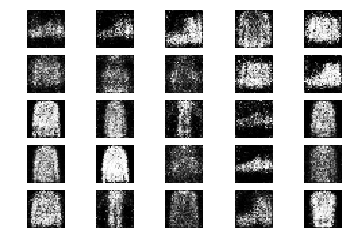

1601 [D loss: 0.674495, acc.: 62.50%] [G loss: 0.945194]
1602 [D loss: 0.623998, acc.: 68.75%] [G loss: 0.850394]
1603 [D loss: 0.610781, acc.: 62.50%] [G loss: 0.958184]
1604 [D loss: 0.642688, acc.: 68.75%] [G loss: 0.924118]
1605 [D loss: 0.546537, acc.: 78.12%] [G loss: 0.869676]
1606 [D loss: 0.704230, acc.: 64.06%] [G loss: 0.830496]
1607 [D loss: 0.615268, acc.: 60.94%] [G loss: 0.817967]
1608 [D loss: 0.558978, acc.: 71.88%] [G loss: 0.941183]
1609 [D loss: 0.621866, acc.: 65.62%] [G loss: 0.795761]
1610 [D loss: 0.640465, acc.: 65.62%] [G loss: 0.972671]
1611 [D loss: 0.624732, acc.: 64.06%] [G loss: 0.813858]
1612 [D loss: 0.560383, acc.: 68.75%] [G loss: 0.986428]
1613 [D loss: 0.677287, acc.: 53.12%] [G loss: 0.911801]
1614 [D loss: 0.636788, acc.: 60.94%] [G loss: 0.854331]
1615 [D loss: 0.571446, acc.: 64.06%] [G loss: 0.945512]
1616 [D loss: 0.535201, acc.: 75.00%] [G loss: 0.987239]
1617 [D loss: 0.653976, acc.: 59.38%] [G loss: 0.921986]
1618 [D loss: 0.538970, acc.: 7

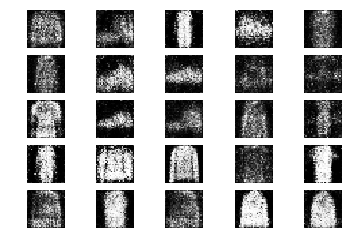

1651 [D loss: 0.720683, acc.: 51.56%] [G loss: 0.808925]
1652 [D loss: 0.653744, acc.: 60.94%] [G loss: 0.791669]
1653 [D loss: 0.589777, acc.: 75.00%] [G loss: 0.844244]
1654 [D loss: 0.591484, acc.: 67.19%] [G loss: 0.907111]
1655 [D loss: 0.622212, acc.: 67.19%] [G loss: 0.875450]
1656 [D loss: 0.545311, acc.: 78.12%] [G loss: 0.955589]
1657 [D loss: 0.599897, acc.: 65.62%] [G loss: 0.910024]
1658 [D loss: 0.544198, acc.: 73.44%] [G loss: 0.970185]
1659 [D loss: 0.635360, acc.: 59.38%] [G loss: 0.954370]
1660 [D loss: 0.656185, acc.: 60.94%] [G loss: 0.915903]
1661 [D loss: 0.602385, acc.: 57.81%] [G loss: 1.016990]
1662 [D loss: 0.637331, acc.: 57.81%] [G loss: 0.848281]
1663 [D loss: 0.685086, acc.: 56.25%] [G loss: 0.906138]
1664 [D loss: 0.620642, acc.: 68.75%] [G loss: 0.900316]
1665 [D loss: 0.618189, acc.: 62.50%] [G loss: 0.833086]
1666 [D loss: 0.686007, acc.: 54.69%] [G loss: 0.979223]
1667 [D loss: 0.627079, acc.: 64.06%] [G loss: 0.903262]
1668 [D loss: 0.625737, acc.: 6

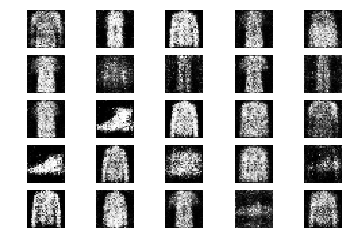

1701 [D loss: 0.640952, acc.: 64.06%] [G loss: 0.979134]
1702 [D loss: 0.638375, acc.: 56.25%] [G loss: 0.988683]
1703 [D loss: 0.607047, acc.: 68.75%] [G loss: 0.895802]
1704 [D loss: 0.619514, acc.: 60.94%] [G loss: 1.083612]
1705 [D loss: 0.703018, acc.: 51.56%] [G loss: 0.976142]
1706 [D loss: 0.530724, acc.: 76.56%] [G loss: 0.948097]
1707 [D loss: 0.606256, acc.: 64.06%] [G loss: 0.968903]
1708 [D loss: 0.578835, acc.: 67.19%] [G loss: 0.926481]
1709 [D loss: 0.622261, acc.: 67.19%] [G loss: 1.057395]
1710 [D loss: 0.625652, acc.: 65.62%] [G loss: 0.973422]
1711 [D loss: 0.624554, acc.: 67.19%] [G loss: 0.980359]
1712 [D loss: 0.698969, acc.: 54.69%] [G loss: 0.924344]
1713 [D loss: 0.572487, acc.: 67.19%] [G loss: 1.024593]
1714 [D loss: 0.707065, acc.: 53.12%] [G loss: 0.868075]
1715 [D loss: 0.564127, acc.: 75.00%] [G loss: 0.911211]
1716 [D loss: 0.616258, acc.: 67.19%] [G loss: 0.935748]
1717 [D loss: 0.592013, acc.: 70.31%] [G loss: 0.986674]
1718 [D loss: 0.668047, acc.: 6

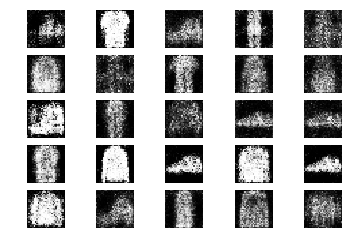

1751 [D loss: 0.565127, acc.: 76.56%] [G loss: 0.870521]
1752 [D loss: 0.572465, acc.: 67.19%] [G loss: 0.961107]
1753 [D loss: 0.637263, acc.: 57.81%] [G loss: 1.057959]
1754 [D loss: 0.604809, acc.: 65.62%] [G loss: 1.211789]
1755 [D loss: 0.596435, acc.: 68.75%] [G loss: 1.066112]
1756 [D loss: 0.642964, acc.: 64.06%] [G loss: 0.870979]
1757 [D loss: 0.687757, acc.: 48.44%] [G loss: 0.977509]
1758 [D loss: 0.555498, acc.: 76.56%] [G loss: 0.894589]
1759 [D loss: 0.614703, acc.: 59.38%] [G loss: 0.867569]
1760 [D loss: 0.663518, acc.: 57.81%] [G loss: 0.904688]
1761 [D loss: 0.605760, acc.: 71.88%] [G loss: 0.907901]
1762 [D loss: 0.631942, acc.: 67.19%] [G loss: 0.915606]
1763 [D loss: 0.601370, acc.: 70.31%] [G loss: 0.990542]
1764 [D loss: 0.706169, acc.: 50.00%] [G loss: 0.804674]
1765 [D loss: 0.635322, acc.: 65.62%] [G loss: 0.931621]
1766 [D loss: 0.616911, acc.: 59.38%] [G loss: 0.908734]
1767 [D loss: 0.640701, acc.: 62.50%] [G loss: 1.008714]
1768 [D loss: 0.611475, acc.: 6

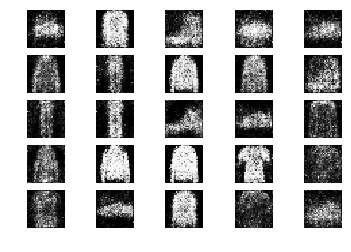

1801 [D loss: 0.588548, acc.: 67.19%] [G loss: 0.946818]
1802 [D loss: 0.613243, acc.: 67.19%] [G loss: 1.039073]
1803 [D loss: 0.592345, acc.: 60.94%] [G loss: 0.978989]
1804 [D loss: 0.689366, acc.: 57.81%] [G loss: 0.905991]
1805 [D loss: 0.627417, acc.: 64.06%] [G loss: 0.964177]
1806 [D loss: 0.691920, acc.: 57.81%] [G loss: 0.961892]
1807 [D loss: 0.639597, acc.: 60.94%] [G loss: 1.033787]
1808 [D loss: 0.596349, acc.: 71.88%] [G loss: 0.884212]
1809 [D loss: 0.567989, acc.: 75.00%] [G loss: 0.892811]
1810 [D loss: 0.623497, acc.: 65.62%] [G loss: 0.950135]
1811 [D loss: 0.644395, acc.: 62.50%] [G loss: 0.919066]
1812 [D loss: 0.653145, acc.: 60.94%] [G loss: 0.848998]
1813 [D loss: 0.561025, acc.: 70.31%] [G loss: 0.919251]
1814 [D loss: 0.658241, acc.: 60.94%] [G loss: 0.888015]
1815 [D loss: 0.686204, acc.: 59.38%] [G loss: 0.964804]
1816 [D loss: 0.562922, acc.: 71.88%] [G loss: 0.907931]
1817 [D loss: 0.671993, acc.: 62.50%] [G loss: 0.969347]
1818 [D loss: 0.638614, acc.: 6

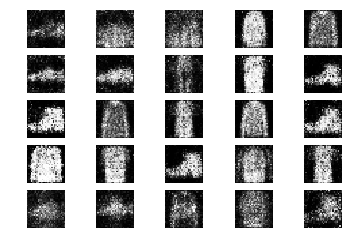

1851 [D loss: 0.630373, acc.: 62.50%] [G loss: 0.863166]
1852 [D loss: 0.588481, acc.: 67.19%] [G loss: 0.911874]
1853 [D loss: 0.681547, acc.: 54.69%] [G loss: 0.987706]
1854 [D loss: 0.553343, acc.: 75.00%] [G loss: 0.866633]
1855 [D loss: 0.605210, acc.: 73.44%] [G loss: 0.898001]
1856 [D loss: 0.635112, acc.: 67.19%] [G loss: 0.860552]
1857 [D loss: 0.636406, acc.: 60.94%] [G loss: 0.947483]
1858 [D loss: 0.600774, acc.: 71.88%] [G loss: 0.985413]
1859 [D loss: 0.637147, acc.: 62.50%] [G loss: 0.876240]
1860 [D loss: 0.617490, acc.: 60.94%] [G loss: 0.868407]
1861 [D loss: 0.624967, acc.: 65.62%] [G loss: 0.963421]
1862 [D loss: 0.617492, acc.: 67.19%] [G loss: 0.906124]
1863 [D loss: 0.689219, acc.: 57.81%] [G loss: 1.023726]
1864 [D loss: 0.733635, acc.: 43.75%] [G loss: 0.876772]
1865 [D loss: 0.602395, acc.: 65.62%] [G loss: 0.856281]
1866 [D loss: 0.607723, acc.: 68.75%] [G loss: 0.987082]
1867 [D loss: 0.648393, acc.: 60.94%] [G loss: 0.973424]
1868 [D loss: 0.612987, acc.: 7

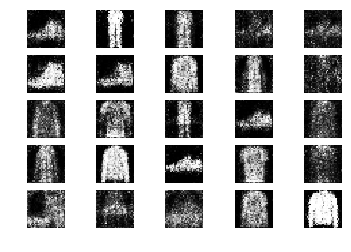

1901 [D loss: 0.636069, acc.: 67.19%] [G loss: 0.935553]
1902 [D loss: 0.632742, acc.: 60.94%] [G loss: 1.084528]
1903 [D loss: 0.555275, acc.: 78.12%] [G loss: 0.851237]
1904 [D loss: 0.594029, acc.: 67.19%] [G loss: 0.957541]
1905 [D loss: 0.573702, acc.: 68.75%] [G loss: 1.015705]
1906 [D loss: 0.618414, acc.: 73.44%] [G loss: 0.981751]
1907 [D loss: 0.631858, acc.: 65.62%] [G loss: 0.945071]
1908 [D loss: 0.627398, acc.: 60.94%] [G loss: 0.796409]
1909 [D loss: 0.621470, acc.: 59.38%] [G loss: 1.095147]
1910 [D loss: 0.577658, acc.: 67.19%] [G loss: 0.950091]
1911 [D loss: 0.667365, acc.: 54.69%] [G loss: 0.943372]
1912 [D loss: 0.565441, acc.: 75.00%] [G loss: 0.957713]
1913 [D loss: 0.614898, acc.: 71.88%] [G loss: 0.897162]
1914 [D loss: 0.658136, acc.: 59.38%] [G loss: 0.885613]
1915 [D loss: 0.583978, acc.: 71.88%] [G loss: 0.968711]
1916 [D loss: 0.628522, acc.: 60.94%] [G loss: 0.965294]
1917 [D loss: 0.684593, acc.: 57.81%] [G loss: 0.861464]
1918 [D loss: 0.601956, acc.: 6

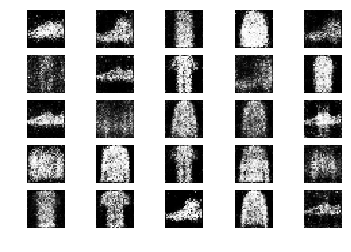

1951 [D loss: 0.619514, acc.: 65.62%] [G loss: 0.911131]
1952 [D loss: 0.589774, acc.: 64.06%] [G loss: 0.993925]
1953 [D loss: 0.624443, acc.: 64.06%] [G loss: 0.877342]
1954 [D loss: 0.548625, acc.: 71.88%] [G loss: 0.966219]
1955 [D loss: 0.562154, acc.: 73.44%] [G loss: 0.932515]
1956 [D loss: 0.639346, acc.: 56.25%] [G loss: 0.934832]
1957 [D loss: 0.635391, acc.: 60.94%] [G loss: 0.923844]
1958 [D loss: 0.645857, acc.: 65.62%] [G loss: 0.994909]
1959 [D loss: 0.650501, acc.: 53.12%] [G loss: 0.922450]
1960 [D loss: 0.617755, acc.: 56.25%] [G loss: 1.002072]
1961 [D loss: 0.657344, acc.: 65.62%] [G loss: 0.995372]
1962 [D loss: 0.625182, acc.: 67.19%] [G loss: 0.911797]
1963 [D loss: 0.545886, acc.: 79.69%] [G loss: 0.924108]
1964 [D loss: 0.659812, acc.: 56.25%] [G loss: 0.962074]
1965 [D loss: 0.622715, acc.: 64.06%] [G loss: 0.885547]
1966 [D loss: 0.566607, acc.: 79.69%] [G loss: 0.873975]
1967 [D loss: 0.600644, acc.: 68.75%] [G loss: 0.797738]
1968 [D loss: 0.642510, acc.: 6

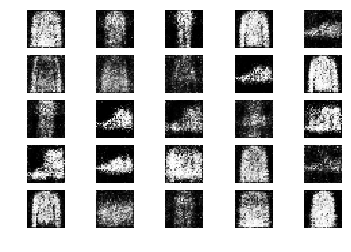

2001 [D loss: 0.618509, acc.: 67.19%] [G loss: 0.977191]
2002 [D loss: 0.600689, acc.: 68.75%] [G loss: 0.857741]
2003 [D loss: 0.621254, acc.: 73.44%] [G loss: 1.007255]
2004 [D loss: 0.614650, acc.: 67.19%] [G loss: 0.928272]
2005 [D loss: 0.616663, acc.: 65.62%] [G loss: 1.015991]
2006 [D loss: 0.586176, acc.: 65.62%] [G loss: 0.954882]
2007 [D loss: 0.596356, acc.: 62.50%] [G loss: 0.912379]
2008 [D loss: 0.549909, acc.: 73.44%] [G loss: 1.010485]
2009 [D loss: 0.536086, acc.: 71.88%] [G loss: 1.028060]
2010 [D loss: 0.665148, acc.: 64.06%] [G loss: 1.002611]
2011 [D loss: 0.587510, acc.: 68.75%] [G loss: 0.909285]
2012 [D loss: 0.666678, acc.: 60.94%] [G loss: 0.894395]
2013 [D loss: 0.612870, acc.: 54.69%] [G loss: 1.040251]
2014 [D loss: 0.664840, acc.: 57.81%] [G loss: 0.927890]
2015 [D loss: 0.606719, acc.: 65.62%] [G loss: 0.923900]
2016 [D loss: 0.667883, acc.: 64.06%] [G loss: 0.879263]
2017 [D loss: 0.596412, acc.: 68.75%] [G loss: 0.946043]
2018 [D loss: 0.539808, acc.: 7

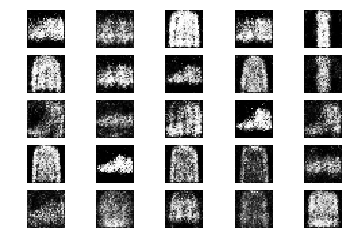

2051 [D loss: 0.625581, acc.: 65.62%] [G loss: 0.948464]
2052 [D loss: 0.629773, acc.: 67.19%] [G loss: 0.867915]
2053 [D loss: 0.625961, acc.: 60.94%] [G loss: 0.955387]
2054 [D loss: 0.579671, acc.: 75.00%] [G loss: 1.001004]
2055 [D loss: 0.549595, acc.: 73.44%] [G loss: 1.011226]
2056 [D loss: 0.662083, acc.: 65.62%] [G loss: 1.024678]
2057 [D loss: 0.687348, acc.: 62.50%] [G loss: 0.928693]
2058 [D loss: 0.563012, acc.: 71.88%] [G loss: 1.086737]
2059 [D loss: 0.613872, acc.: 70.31%] [G loss: 0.951133]
2060 [D loss: 0.654224, acc.: 57.81%] [G loss: 0.957541]
2061 [D loss: 0.595407, acc.: 70.31%] [G loss: 0.939335]
2062 [D loss: 0.611540, acc.: 68.75%] [G loss: 0.974746]
2063 [D loss: 0.561325, acc.: 75.00%] [G loss: 0.966979]
2064 [D loss: 0.578544, acc.: 75.00%] [G loss: 0.935340]
2065 [D loss: 0.678061, acc.: 65.62%] [G loss: 0.863415]
2066 [D loss: 0.628851, acc.: 68.75%] [G loss: 1.019480]
2067 [D loss: 0.691252, acc.: 54.69%] [G loss: 0.771010]
2068 [D loss: 0.538756, acc.: 7

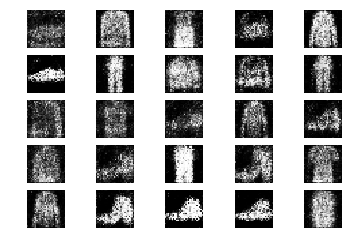

2101 [D loss: 0.673835, acc.: 62.50%] [G loss: 0.961442]
2102 [D loss: 0.562708, acc.: 75.00%] [G loss: 1.016272]
2103 [D loss: 0.564759, acc.: 70.31%] [G loss: 1.072795]
2104 [D loss: 0.603686, acc.: 67.19%] [G loss: 0.930536]
2105 [D loss: 0.579572, acc.: 68.75%] [G loss: 0.949321]
2106 [D loss: 0.607795, acc.: 73.44%] [G loss: 1.042138]
2107 [D loss: 0.620754, acc.: 64.06%] [G loss: 1.028598]
2108 [D loss: 0.502609, acc.: 76.56%] [G loss: 1.004099]
2109 [D loss: 0.647473, acc.: 65.62%] [G loss: 0.967020]
2110 [D loss: 0.618310, acc.: 59.38%] [G loss: 1.000401]
2111 [D loss: 0.624943, acc.: 62.50%] [G loss: 0.906822]
2112 [D loss: 0.630899, acc.: 56.25%] [G loss: 0.928762]
2113 [D loss: 0.603495, acc.: 57.81%] [G loss: 1.056431]
2114 [D loss: 0.648798, acc.: 57.81%] [G loss: 0.981550]
2115 [D loss: 0.627709, acc.: 62.50%] [G loss: 0.980014]
2116 [D loss: 0.584951, acc.: 70.31%] [G loss: 0.998023]
2117 [D loss: 0.543380, acc.: 71.88%] [G loss: 1.087515]
2118 [D loss: 0.597352, acc.: 6

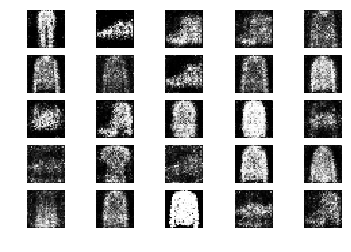

2151 [D loss: 0.583106, acc.: 68.75%] [G loss: 0.891314]
2152 [D loss: 0.606397, acc.: 65.62%] [G loss: 0.960038]
2153 [D loss: 0.631146, acc.: 62.50%] [G loss: 0.955449]
2154 [D loss: 0.682854, acc.: 56.25%] [G loss: 0.979239]
2155 [D loss: 0.601789, acc.: 71.88%] [G loss: 0.947023]
2156 [D loss: 0.601566, acc.: 67.19%] [G loss: 1.041678]
2157 [D loss: 0.617267, acc.: 62.50%] [G loss: 0.972886]
2158 [D loss: 0.691153, acc.: 59.38%] [G loss: 0.912968]
2159 [D loss: 0.637588, acc.: 56.25%] [G loss: 0.947357]
2160 [D loss: 0.663568, acc.: 59.38%] [G loss: 0.921153]
2161 [D loss: 0.556876, acc.: 68.75%] [G loss: 0.983460]
2162 [D loss: 0.638553, acc.: 59.38%] [G loss: 0.972635]
2163 [D loss: 0.571045, acc.: 76.56%] [G loss: 0.980899]
2164 [D loss: 0.683258, acc.: 59.38%] [G loss: 0.997327]
2165 [D loss: 0.610093, acc.: 73.44%] [G loss: 1.020542]
2166 [D loss: 0.586527, acc.: 70.31%] [G loss: 1.014148]
2167 [D loss: 0.646559, acc.: 64.06%] [G loss: 1.051790]
2168 [D loss: 0.633935, acc.: 6

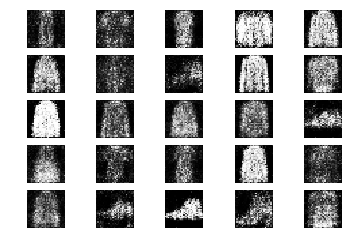

2201 [D loss: 0.566155, acc.: 67.19%] [G loss: 0.882394]
2202 [D loss: 0.625737, acc.: 60.94%] [G loss: 0.909987]
2203 [D loss: 0.596708, acc.: 64.06%] [G loss: 0.981191]
2204 [D loss: 0.649668, acc.: 65.62%] [G loss: 0.944812]
2205 [D loss: 0.649426, acc.: 56.25%] [G loss: 0.911542]
2206 [D loss: 0.631579, acc.: 54.69%] [G loss: 0.997090]
2207 [D loss: 0.584704, acc.: 67.19%] [G loss: 1.033619]
2208 [D loss: 0.567983, acc.: 73.44%] [G loss: 1.039923]
2209 [D loss: 0.644627, acc.: 64.06%] [G loss: 0.983975]
2210 [D loss: 0.632213, acc.: 60.94%] [G loss: 1.100747]
2211 [D loss: 0.598956, acc.: 68.75%] [G loss: 0.967947]
2212 [D loss: 0.652449, acc.: 64.06%] [G loss: 1.004764]
2213 [D loss: 0.633802, acc.: 64.06%] [G loss: 0.997678]
2214 [D loss: 0.650228, acc.: 65.62%] [G loss: 1.056556]
2215 [D loss: 0.613598, acc.: 67.19%] [G loss: 1.112598]
2216 [D loss: 0.552734, acc.: 76.56%] [G loss: 0.943617]
2217 [D loss: 0.616853, acc.: 71.88%] [G loss: 1.046779]
2218 [D loss: 0.659718, acc.: 5

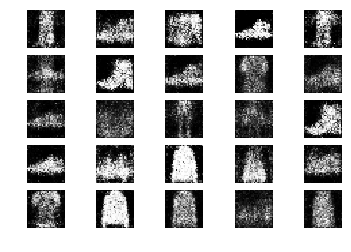

2251 [D loss: 0.674047, acc.: 62.50%] [G loss: 1.079794]
2252 [D loss: 0.629174, acc.: 59.38%] [G loss: 1.069647]
2253 [D loss: 0.571498, acc.: 65.62%] [G loss: 0.988341]
2254 [D loss: 0.675114, acc.: 68.75%] [G loss: 0.928473]
2255 [D loss: 0.686908, acc.: 57.81%] [G loss: 0.937808]
2256 [D loss: 0.628387, acc.: 64.06%] [G loss: 0.974078]
2257 [D loss: 0.659882, acc.: 53.12%] [G loss: 0.940141]
2258 [D loss: 0.576574, acc.: 70.31%] [G loss: 0.889213]
2259 [D loss: 0.629518, acc.: 70.31%] [G loss: 0.950015]
2260 [D loss: 0.603575, acc.: 67.19%] [G loss: 0.951521]
2261 [D loss: 0.647503, acc.: 64.06%] [G loss: 0.915024]
2262 [D loss: 0.585176, acc.: 68.75%] [G loss: 0.975953]
2263 [D loss: 0.574325, acc.: 71.88%] [G loss: 1.041481]
2264 [D loss: 0.649663, acc.: 62.50%] [G loss: 0.929329]
2265 [D loss: 0.642774, acc.: 62.50%] [G loss: 0.903018]
2266 [D loss: 0.571047, acc.: 71.88%] [G loss: 1.035366]
2267 [D loss: 0.633957, acc.: 65.62%] [G loss: 1.002554]
2268 [D loss: 0.570562, acc.: 7

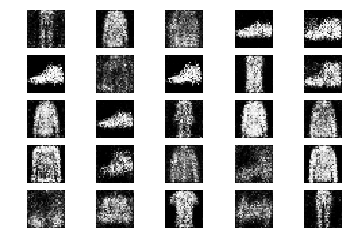

2301 [D loss: 0.648416, acc.: 62.50%] [G loss: 0.896271]
2302 [D loss: 0.651168, acc.: 62.50%] [G loss: 0.940368]
2303 [D loss: 0.701655, acc.: 57.81%] [G loss: 0.859351]
2304 [D loss: 0.603939, acc.: 71.88%] [G loss: 1.008319]
2305 [D loss: 0.687007, acc.: 56.25%] [G loss: 0.895847]
2306 [D loss: 0.611642, acc.: 59.38%] [G loss: 0.946268]
2307 [D loss: 0.638404, acc.: 62.50%] [G loss: 0.966873]
2308 [D loss: 0.607544, acc.: 68.75%] [G loss: 0.912757]
2309 [D loss: 0.634261, acc.: 65.62%] [G loss: 0.951759]
2310 [D loss: 0.615742, acc.: 67.19%] [G loss: 1.004345]
2311 [D loss: 0.556720, acc.: 73.44%] [G loss: 1.006522]
2312 [D loss: 0.608361, acc.: 70.31%] [G loss: 0.993381]
2313 [D loss: 0.641870, acc.: 57.81%] [G loss: 0.961420]
2314 [D loss: 0.632579, acc.: 60.94%] [G loss: 1.019528]
2315 [D loss: 0.558021, acc.: 67.19%] [G loss: 0.911644]
2316 [D loss: 0.572663, acc.: 68.75%] [G loss: 0.929257]
2317 [D loss: 0.580980, acc.: 75.00%] [G loss: 0.985305]
2318 [D loss: 0.614764, acc.: 6

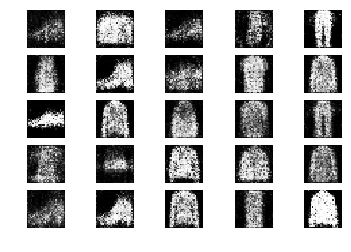

2351 [D loss: 0.637131, acc.: 57.81%] [G loss: 0.967080]
2352 [D loss: 0.568426, acc.: 67.19%] [G loss: 0.931566]
2353 [D loss: 0.617492, acc.: 67.19%] [G loss: 0.844236]
2354 [D loss: 0.637208, acc.: 62.50%] [G loss: 0.908394]
2355 [D loss: 0.635055, acc.: 65.62%] [G loss: 0.971972]
2356 [D loss: 0.608590, acc.: 70.31%] [G loss: 0.882427]
2357 [D loss: 0.579676, acc.: 76.56%] [G loss: 0.925629]
2358 [D loss: 0.608441, acc.: 68.75%] [G loss: 0.973424]
2359 [D loss: 0.595647, acc.: 67.19%] [G loss: 1.008387]
2360 [D loss: 0.601184, acc.: 67.19%] [G loss: 1.033770]
2361 [D loss: 0.653726, acc.: 60.94%] [G loss: 0.934003]
2362 [D loss: 0.605142, acc.: 65.62%] [G loss: 0.951472]
2363 [D loss: 0.669983, acc.: 59.38%] [G loss: 0.946614]
2364 [D loss: 0.631980, acc.: 62.50%] [G loss: 0.956575]
2365 [D loss: 0.551064, acc.: 76.56%] [G loss: 0.952082]
2366 [D loss: 0.633541, acc.: 62.50%] [G loss: 0.979631]
2367 [D loss: 0.734836, acc.: 51.56%] [G loss: 0.918812]
2368 [D loss: 0.582636, acc.: 7

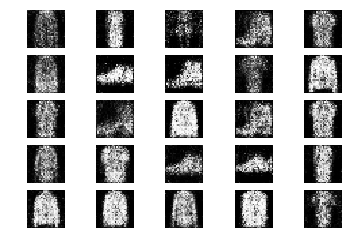

2401 [D loss: 0.646389, acc.: 57.81%] [G loss: 0.956276]
2402 [D loss: 0.670100, acc.: 56.25%] [G loss: 0.892806]
2403 [D loss: 0.553295, acc.: 71.88%] [G loss: 1.072982]
2404 [D loss: 0.594766, acc.: 65.62%] [G loss: 0.921901]
2405 [D loss: 0.533392, acc.: 76.56%] [G loss: 1.012539]
2406 [D loss: 0.536647, acc.: 75.00%] [G loss: 1.007661]
2407 [D loss: 0.636590, acc.: 64.06%] [G loss: 0.974185]
2408 [D loss: 0.587965, acc.: 59.38%] [G loss: 0.890837]
2409 [D loss: 0.627918, acc.: 73.44%] [G loss: 0.931948]
2410 [D loss: 0.583002, acc.: 67.19%] [G loss: 0.925546]
2411 [D loss: 0.593222, acc.: 68.75%] [G loss: 0.962555]
2412 [D loss: 0.618092, acc.: 67.19%] [G loss: 1.008598]
2413 [D loss: 0.604648, acc.: 70.31%] [G loss: 1.024429]
2414 [D loss: 0.551519, acc.: 76.56%] [G loss: 0.823161]
2415 [D loss: 0.666181, acc.: 60.94%] [G loss: 0.874361]
2416 [D loss: 0.592476, acc.: 65.62%] [G loss: 0.867890]
2417 [D loss: 0.645561, acc.: 59.38%] [G loss: 0.926645]
2418 [D loss: 0.565981, acc.: 7

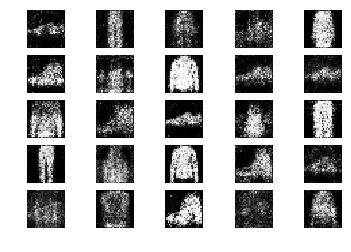

2451 [D loss: 0.625261, acc.: 67.19%] [G loss: 0.909735]
2452 [D loss: 0.608625, acc.: 67.19%] [G loss: 0.945590]
2453 [D loss: 0.643679, acc.: 70.31%] [G loss: 0.929392]
2454 [D loss: 0.655097, acc.: 60.94%] [G loss: 0.872769]
2455 [D loss: 0.619525, acc.: 64.06%] [G loss: 0.881514]
2456 [D loss: 0.587716, acc.: 70.31%] [G loss: 0.894406]
2457 [D loss: 0.738689, acc.: 54.69%] [G loss: 0.927782]
2458 [D loss: 0.657791, acc.: 62.50%] [G loss: 0.942479]
2459 [D loss: 0.575102, acc.: 75.00%] [G loss: 1.028523]
2460 [D loss: 0.561323, acc.: 79.69%] [G loss: 1.072836]
2461 [D loss: 0.636582, acc.: 59.38%] [G loss: 0.957004]
2462 [D loss: 0.545319, acc.: 76.56%] [G loss: 0.971532]
2463 [D loss: 0.577276, acc.: 71.88%] [G loss: 0.981404]
2464 [D loss: 0.583824, acc.: 67.19%] [G loss: 0.978029]
2465 [D loss: 0.552723, acc.: 70.31%] [G loss: 0.912478]
2466 [D loss: 0.598229, acc.: 65.62%] [G loss: 0.922555]
2467 [D loss: 0.687962, acc.: 56.25%] [G loss: 1.012877]
2468 [D loss: 0.663315, acc.: 6

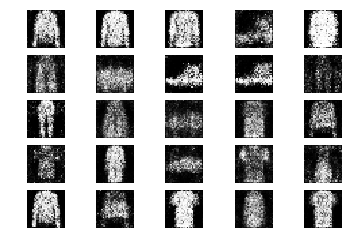

2501 [D loss: 0.583947, acc.: 67.19%] [G loss: 0.882414]
2502 [D loss: 0.596805, acc.: 64.06%] [G loss: 0.986329]
2503 [D loss: 0.616944, acc.: 64.06%] [G loss: 0.933945]
2504 [D loss: 0.620400, acc.: 64.06%] [G loss: 1.004432]
2505 [D loss: 0.597582, acc.: 68.75%] [G loss: 0.904183]
2506 [D loss: 0.636056, acc.: 60.94%] [G loss: 0.961362]
2507 [D loss: 0.650091, acc.: 57.81%] [G loss: 0.947124]
2508 [D loss: 0.601503, acc.: 67.19%] [G loss: 0.961776]
2509 [D loss: 0.599607, acc.: 67.19%] [G loss: 1.006140]
2510 [D loss: 0.569568, acc.: 75.00%] [G loss: 0.988503]
2511 [D loss: 0.584099, acc.: 67.19%] [G loss: 0.969309]
2512 [D loss: 0.658740, acc.: 64.06%] [G loss: 1.026371]
2513 [D loss: 0.607873, acc.: 68.75%] [G loss: 0.909467]
2514 [D loss: 0.609002, acc.: 67.19%] [G loss: 1.016619]
2515 [D loss: 0.606602, acc.: 71.88%] [G loss: 0.893178]
2516 [D loss: 0.622106, acc.: 68.75%] [G loss: 0.993702]
2517 [D loss: 0.660530, acc.: 64.06%] [G loss: 0.952001]
2518 [D loss: 0.609254, acc.: 6

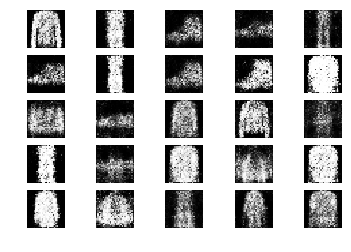

2551 [D loss: 0.553653, acc.: 73.44%] [G loss: 0.939742]
2552 [D loss: 0.678658, acc.: 62.50%] [G loss: 0.956928]
2553 [D loss: 0.716933, acc.: 48.44%] [G loss: 1.103594]
2554 [D loss: 0.605612, acc.: 70.31%] [G loss: 0.904785]
2555 [D loss: 0.615275, acc.: 64.06%] [G loss: 0.942843]
2556 [D loss: 0.635516, acc.: 65.62%] [G loss: 0.937229]
2557 [D loss: 0.647563, acc.: 50.00%] [G loss: 0.913874]
2558 [D loss: 0.548654, acc.: 65.62%] [G loss: 1.055977]
2559 [D loss: 0.699542, acc.: 50.00%] [G loss: 0.870000]
2560 [D loss: 0.650358, acc.: 64.06%] [G loss: 0.985085]
2561 [D loss: 0.658808, acc.: 56.25%] [G loss: 0.868396]
2562 [D loss: 0.605427, acc.: 65.62%] [G loss: 0.926910]
2563 [D loss: 0.634448, acc.: 60.94%] [G loss: 0.989604]
2564 [D loss: 0.686074, acc.: 56.25%] [G loss: 0.868366]
2565 [D loss: 0.614340, acc.: 70.31%] [G loss: 0.852356]
2566 [D loss: 0.623958, acc.: 64.06%] [G loss: 1.002736]
2567 [D loss: 0.631213, acc.: 68.75%] [G loss: 0.946906]
2568 [D loss: 0.614651, acc.: 6

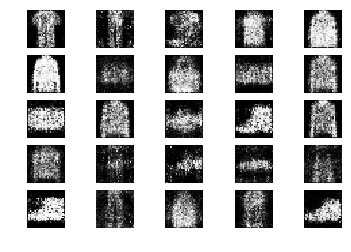

2601 [D loss: 0.610044, acc.: 62.50%] [G loss: 0.942570]
2602 [D loss: 0.638000, acc.: 70.31%] [G loss: 0.872914]
2603 [D loss: 0.619831, acc.: 68.75%] [G loss: 0.931520]
2604 [D loss: 0.677063, acc.: 62.50%] [G loss: 0.931524]
2605 [D loss: 0.636751, acc.: 60.94%] [G loss: 0.920392]
2606 [D loss: 0.621820, acc.: 67.19%] [G loss: 0.894858]
2607 [D loss: 0.568551, acc.: 64.06%] [G loss: 1.058195]
2608 [D loss: 0.707114, acc.: 51.56%] [G loss: 0.930103]
2609 [D loss: 0.637103, acc.: 60.94%] [G loss: 1.000433]
2610 [D loss: 0.643525, acc.: 59.38%] [G loss: 0.935816]
2611 [D loss: 0.684587, acc.: 57.81%] [G loss: 0.835059]
2612 [D loss: 0.656889, acc.: 60.94%] [G loss: 1.004218]
2613 [D loss: 0.626859, acc.: 59.38%] [G loss: 0.903879]
2614 [D loss: 0.650486, acc.: 60.94%] [G loss: 0.910085]
2615 [D loss: 0.612025, acc.: 64.06%] [G loss: 0.992493]
2616 [D loss: 0.613387, acc.: 60.94%] [G loss: 0.870997]
2617 [D loss: 0.597683, acc.: 68.75%] [G loss: 0.812231]
2618 [D loss: 0.621960, acc.: 6

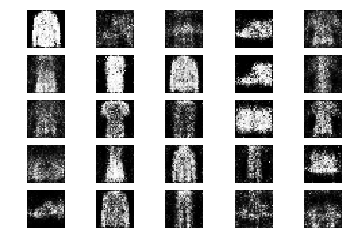

2651 [D loss: 0.662164, acc.: 60.94%] [G loss: 1.044055]
2652 [D loss: 0.646699, acc.: 59.38%] [G loss: 0.925966]
2653 [D loss: 0.622842, acc.: 67.19%] [G loss: 0.979206]
2654 [D loss: 0.622354, acc.: 62.50%] [G loss: 0.991728]
2655 [D loss: 0.658892, acc.: 56.25%] [G loss: 0.925681]
2656 [D loss: 0.618587, acc.: 60.94%] [G loss: 0.989443]
2657 [D loss: 0.613230, acc.: 70.31%] [G loss: 0.896080]
2658 [D loss: 0.622380, acc.: 68.75%] [G loss: 0.976052]
2659 [D loss: 0.611091, acc.: 59.38%] [G loss: 1.033716]
2660 [D loss: 0.641226, acc.: 65.62%] [G loss: 0.925387]
2661 [D loss: 0.650697, acc.: 60.94%] [G loss: 0.917587]
2662 [D loss: 0.644056, acc.: 62.50%] [G loss: 0.857117]
2663 [D loss: 0.591961, acc.: 64.06%] [G loss: 0.964987]
2664 [D loss: 0.627395, acc.: 71.88%] [G loss: 0.868651]
2665 [D loss: 0.606614, acc.: 73.44%] [G loss: 1.039538]
2666 [D loss: 0.630959, acc.: 70.31%] [G loss: 0.917246]
2667 [D loss: 0.613816, acc.: 60.94%] [G loss: 1.085517]
2668 [D loss: 0.577709, acc.: 7

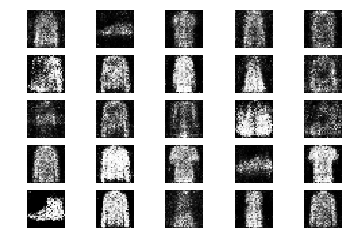

2701 [D loss: 0.604813, acc.: 67.19%] [G loss: 0.926286]
2702 [D loss: 0.597372, acc.: 70.31%] [G loss: 0.880500]
2703 [D loss: 0.596774, acc.: 68.75%] [G loss: 0.994483]
2704 [D loss: 0.632106, acc.: 67.19%] [G loss: 0.915203]
2705 [D loss: 0.685085, acc.: 56.25%] [G loss: 0.910797]
2706 [D loss: 0.658002, acc.: 60.94%] [G loss: 0.924341]
2707 [D loss: 0.586180, acc.: 65.62%] [G loss: 0.897792]
2708 [D loss: 0.592720, acc.: 65.62%] [G loss: 0.970046]
2709 [D loss: 0.656951, acc.: 57.81%] [G loss: 1.013818]
2710 [D loss: 0.639075, acc.: 64.06%] [G loss: 0.941093]
2711 [D loss: 0.603879, acc.: 65.62%] [G loss: 0.954949]
2712 [D loss: 0.586146, acc.: 62.50%] [G loss: 0.990835]
2713 [D loss: 0.601408, acc.: 68.75%] [G loss: 0.914757]
2714 [D loss: 0.703122, acc.: 54.69%] [G loss: 0.919056]
2715 [D loss: 0.591251, acc.: 70.31%] [G loss: 1.027751]
2716 [D loss: 0.690299, acc.: 53.12%] [G loss: 0.966231]
2717 [D loss: 0.712369, acc.: 51.56%] [G loss: 1.083043]
2718 [D loss: 0.604963, acc.: 6

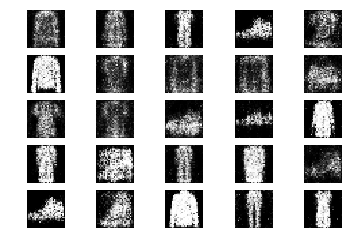

2751 [D loss: 0.704719, acc.: 51.56%] [G loss: 0.999912]
2752 [D loss: 0.673722, acc.: 56.25%] [G loss: 0.881323]
2753 [D loss: 0.628325, acc.: 60.94%] [G loss: 0.970508]
2754 [D loss: 0.613120, acc.: 60.94%] [G loss: 0.874520]
2755 [D loss: 0.613038, acc.: 60.94%] [G loss: 0.944857]
2756 [D loss: 0.638579, acc.: 67.19%] [G loss: 0.905769]
2757 [D loss: 0.641784, acc.: 54.69%] [G loss: 0.930528]
2758 [D loss: 0.641107, acc.: 65.62%] [G loss: 0.939204]
2759 [D loss: 0.606175, acc.: 70.31%] [G loss: 0.985250]
2760 [D loss: 0.632498, acc.: 64.06%] [G loss: 0.871392]
2761 [D loss: 0.650447, acc.: 56.25%] [G loss: 0.843688]
2762 [D loss: 0.626830, acc.: 60.94%] [G loss: 0.961667]
2763 [D loss: 0.542155, acc.: 73.44%] [G loss: 0.954528]
2764 [D loss: 0.638980, acc.: 62.50%] [G loss: 0.888479]
2765 [D loss: 0.622114, acc.: 64.06%] [G loss: 0.847661]
2766 [D loss: 0.630769, acc.: 67.19%] [G loss: 0.844247]
2767 [D loss: 0.589105, acc.: 62.50%] [G loss: 0.884815]
2768 [D loss: 0.649523, acc.: 6

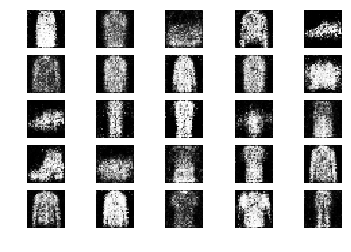

2801 [D loss: 0.672863, acc.: 65.62%] [G loss: 0.938769]
2802 [D loss: 0.641551, acc.: 60.94%] [G loss: 0.906666]
2803 [D loss: 0.614787, acc.: 60.94%] [G loss: 0.974677]
2804 [D loss: 0.710823, acc.: 56.25%] [G loss: 0.942030]
2805 [D loss: 0.620964, acc.: 65.62%] [G loss: 0.926631]
2806 [D loss: 0.648131, acc.: 56.25%] [G loss: 0.914720]
2807 [D loss: 0.596475, acc.: 73.44%] [G loss: 0.908627]
2808 [D loss: 0.629719, acc.: 62.50%] [G loss: 0.925173]
2809 [D loss: 0.600829, acc.: 65.62%] [G loss: 1.017497]
2810 [D loss: 0.582712, acc.: 70.31%] [G loss: 0.935878]
2811 [D loss: 0.722290, acc.: 50.00%] [G loss: 0.953426]
2812 [D loss: 0.639003, acc.: 67.19%] [G loss: 1.071541]
2813 [D loss: 0.581511, acc.: 78.12%] [G loss: 1.009311]
2814 [D loss: 0.571602, acc.: 70.31%] [G loss: 0.904154]
2815 [D loss: 0.665378, acc.: 59.38%] [G loss: 0.923129]
2816 [D loss: 0.579126, acc.: 71.88%] [G loss: 0.966834]
2817 [D loss: 0.687455, acc.: 57.81%] [G loss: 0.937239]
2818 [D loss: 0.675767, acc.: 5

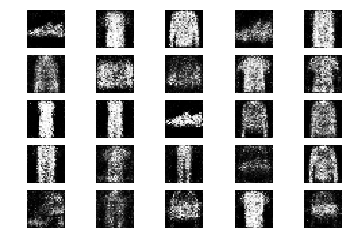

2851 [D loss: 0.665836, acc.: 60.94%] [G loss: 0.899102]
2852 [D loss: 0.536754, acc.: 73.44%] [G loss: 0.955807]
2853 [D loss: 0.566734, acc.: 76.56%] [G loss: 0.994463]
2854 [D loss: 0.575632, acc.: 70.31%] [G loss: 0.973365]
2855 [D loss: 0.650791, acc.: 59.38%] [G loss: 0.980852]
2856 [D loss: 0.595963, acc.: 73.44%] [G loss: 1.054331]
2857 [D loss: 0.635678, acc.: 59.38%] [G loss: 0.878618]
2858 [D loss: 0.708445, acc.: 45.31%] [G loss: 0.971509]
2859 [D loss: 0.612591, acc.: 68.75%] [G loss: 0.965941]
2860 [D loss: 0.626045, acc.: 64.06%] [G loss: 0.985152]
2861 [D loss: 0.770394, acc.: 43.75%] [G loss: 0.859615]
2862 [D loss: 0.586806, acc.: 76.56%] [G loss: 0.930918]
2863 [D loss: 0.665868, acc.: 60.94%] [G loss: 0.853732]
2864 [D loss: 0.632523, acc.: 68.75%] [G loss: 0.960998]
2865 [D loss: 0.580979, acc.: 71.88%] [G loss: 0.867101]
2866 [D loss: 0.612633, acc.: 57.81%] [G loss: 0.957392]
2867 [D loss: 0.641530, acc.: 65.62%] [G loss: 0.920781]
2868 [D loss: 0.664609, acc.: 6

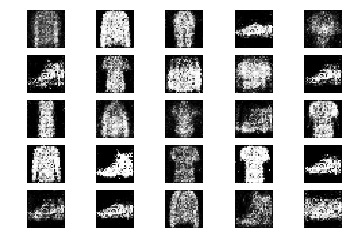

2901 [D loss: 0.671843, acc.: 56.25%] [G loss: 0.963642]
2902 [D loss: 0.567352, acc.: 73.44%] [G loss: 0.968740]
2903 [D loss: 0.599043, acc.: 64.06%] [G loss: 0.901022]
2904 [D loss: 0.550035, acc.: 73.44%] [G loss: 0.935621]
2905 [D loss: 0.654319, acc.: 62.50%] [G loss: 0.958127]
2906 [D loss: 0.571389, acc.: 68.75%] [G loss: 1.086135]
2907 [D loss: 0.612171, acc.: 70.31%] [G loss: 0.968970]
2908 [D loss: 0.666742, acc.: 62.50%] [G loss: 0.887805]
2909 [D loss: 0.602844, acc.: 70.31%] [G loss: 0.959854]
2910 [D loss: 0.624509, acc.: 60.94%] [G loss: 0.967256]
2911 [D loss: 0.572389, acc.: 71.88%] [G loss: 0.913711]
2912 [D loss: 0.645715, acc.: 60.94%] [G loss: 0.857825]
2913 [D loss: 0.674382, acc.: 51.56%] [G loss: 0.943801]
2914 [D loss: 0.698258, acc.: 51.56%] [G loss: 0.897247]
2915 [D loss: 0.622346, acc.: 60.94%] [G loss: 0.866534]
2916 [D loss: 0.654793, acc.: 59.38%] [G loss: 0.957352]
2917 [D loss: 0.645268, acc.: 62.50%] [G loss: 1.100528]
2918 [D loss: 0.694866, acc.: 5

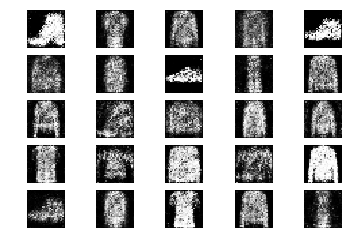

2951 [D loss: 0.619912, acc.: 65.62%] [G loss: 0.904900]
2952 [D loss: 0.622338, acc.: 65.62%] [G loss: 0.930553]
2953 [D loss: 0.635472, acc.: 60.94%] [G loss: 0.817128]
2954 [D loss: 0.636570, acc.: 64.06%] [G loss: 0.874417]
2955 [D loss: 0.613683, acc.: 70.31%] [G loss: 1.047887]
2956 [D loss: 0.651836, acc.: 68.75%] [G loss: 0.998782]
2957 [D loss: 0.623698, acc.: 62.50%] [G loss: 1.015116]
2958 [D loss: 0.655784, acc.: 62.50%] [G loss: 0.923182]
2959 [D loss: 0.603787, acc.: 71.88%] [G loss: 0.894482]
2960 [D loss: 0.665029, acc.: 62.50%] [G loss: 0.925578]
2961 [D loss: 0.636045, acc.: 64.06%] [G loss: 0.870743]
2962 [D loss: 0.604247, acc.: 68.75%] [G loss: 0.919047]
2963 [D loss: 0.651891, acc.: 64.06%] [G loss: 1.078405]
2964 [D loss: 0.561141, acc.: 73.44%] [G loss: 0.992811]
2965 [D loss: 0.611975, acc.: 70.31%] [G loss: 1.044075]
2966 [D loss: 0.717675, acc.: 51.56%] [G loss: 0.876735]
2967 [D loss: 0.622504, acc.: 70.31%] [G loss: 0.914310]
2968 [D loss: 0.631389, acc.: 7

In [35]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

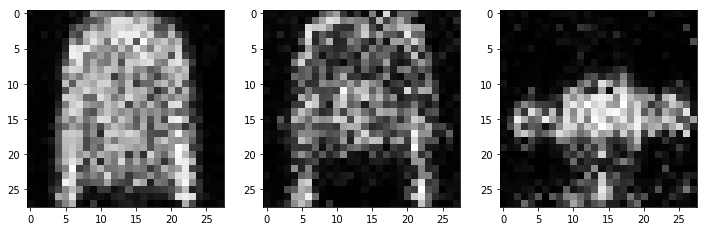

In [37]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()